# Génération des graphiques pour la visualisation des données initiales de la CACPL



## Importation des librairies

In [323]:
import pandas as pd
import json
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

## Connexion à la BDD

In [324]:
fichierConfig = "../../bdd/config.json"

with open(fichierConfig) as fichier:
    config = json.load(fichier)["mysql"]
    
engine = create_engine('mysql+' + config["connector"] + '://' + config["user"] + ":" + config["password"] + "@" + config["host"] + ":" + config["port"] + "/" + config["bdd"], echo=True)

## Récupération et préparation des données

In [325]:
data171819 = pd.read_excel("../../data/collecte verre CACPL/Données Verre 2017-2018- 2019 janv à nov.xlsx", skiprows=[0,1], usecols="B:L")
data20 = pd.read_excel("../../data/collecte verre CACPL/Verre PAV 2020.xlsx", skiprows=[0,1,2], usecols="B:F")

data171819.drop_duplicates(inplace=True)
data20.drop_duplicates(subset=data20.columns[1:], inplace=True)

dictVilles = { "CAN": "Cannes", "CNT": "Le Cannet", "MAN": "Mandelieu-la-Napoule", "MOU": "Mougins", "THE": "Théoule-sur-Mer"}

In [326]:
dictVillesMajuscules = { "CANNES": "Cannes", "LE CANNET": "Le Cannet", "MANDELIEU-LA-NAPOULE": "Mandelieu-la-Napoule", "MOUGINS": "Mougins", "THÉOULE-SUR-MER": "Théoule-sur-Mer"}
for i in data171819.index:
    data171819.loc[i, "Ville"] = dictVillesMajuscules[data171819.loc[i, "Ville"]]
data171819

Collecte Contenant                      Adresse      Ville  Année  \
0          PAV   CNT135V        CHEMIN DES BREGUIERES  Le Cannet   2017   
1          PAV   CNT005V            RUE DES MOULIERES  Le Cannet   2017   
2          PAV   CNT165V              AVENUE DU REPOS  Le Cannet   2017   
3          PAV   CNT115V             RUE DES ORANGERS  Le Cannet   2017   
4          PAV   CNT150V         BOULEVARD D'OLIVETUM  Le Cannet   2017   
...        ...       ...                          ...        ...    ...   
24755      PAV   CAN013V          ALLEE DE LA LIBERTE     Cannes   2019   
24756      PAV   CAN017V               AVENUE LAUGIER     Cannes   2019   
24757      PAV   CAN152V           AVENUE ISOLA BELLA     Cannes   2019   
24758      PAV   CAN159V  55 AVENUE DU ROI ALBERT 1ER     Cannes   2019   
24759      PAV   CAN175V              RUE FELIX FAURE     Cannes   2019   

           MOIS  SEMAINE      date      heure  Taux  Poids Kg  
0       Janvier        1 2017-01-05  06:32:09     2       500  
1       Janvier        1 2017-01-05  06:38:41     2       420  
2       Janvier        1 2017-01-05  06:44:56     1       210  
3       Janvier        1 2017-01-05  06:48:51     2       450  
4       Janvier        1 2017-01-05  06:54:58     3       730  
...         ...      ...        ...       ...   ...       ...  
24755  Novembre       47 2019-11-22  09:04:01     1       250  
24756  Novembre       47 2019-11-22  09:10:11     2       450  
24757  Novembre       47 2019-11-22  07:10:00     4       970  
24758  Novembre       47 2019-11-22  08:13:47     1       230  
24759  Novembre       47 2019-11-22  08:53:39     1       280  

[24759 rows x 11 columns]

In [327]:
for i in data20.index:
    data20.loc[i, "ville"] = dictVilles[data20.loc[i, "Lieu de Collecte"][5:8]]
data20.Poids = (data20.Poids * 1000).astype(int)
data20

Prestation Date de réalisation                 Lieu de Collecte  \
0     12001054939          2020-01-02              CAPL-CNT-VOIE JULIA   
1     12001054940          2020-01-02  CAPL-CNT-BREGUIERES/FONT GALLOU   
2     12001054941          2020-01-02      CAPL-CNT-AV ECOLES/ROTHMANS   
3     12001054942          2020-01-02                CAPL-CAN-MERLETTE   
4     12001054943          2020-01-02                CAPL-CAN-RIOU/HLM   
...           ...                 ...                              ...   
5471  12009697556          2020-09-30   CAPL-CAN-GOURGUETTES/RONDPOINT   
5472  12009697557          2020-09-30   CAPL-CAN-GOURGUETTES/ARRET BUS   
5473  12009697554          2020-09-30          CAPL-CAN-BALZAC/LECLERC   
5474  12009697559          2020-09-30     CAPL-CAN-JOURDAN/ENTREE ANAS   
5475  12009697558          2020-09-30        CAPL-CAN-JOURDAN/RANCHITO   

                     Matériel  Poids      ville  
0              COLONNE K 3 m3    436  Le Cannet  
1              COLONNE K 3 m3    436  Le Cannet  
2              COLONNE K 3 m3    436  Le Cannet  
3            COLONNE K 2,5 m3    545     Cannes  
4              COLONNE K 4 m3    581     Cannes  
...                       ...    ...        ...  
5471           COLONNE K 3 m3    180     Cannes  
5472  COLONNE ENTERREE K 4 m3    240     Cannes  
5473           COLONNE K 3 m3    360     Cannes  
5474           COLONNE K 3 m3    180     Cannes  
5475           COLONNE K 3 m3    180     Cannes  

[5386 rows x 6 columns]

## Graphiques sur les nombres de collectes par ville et par année

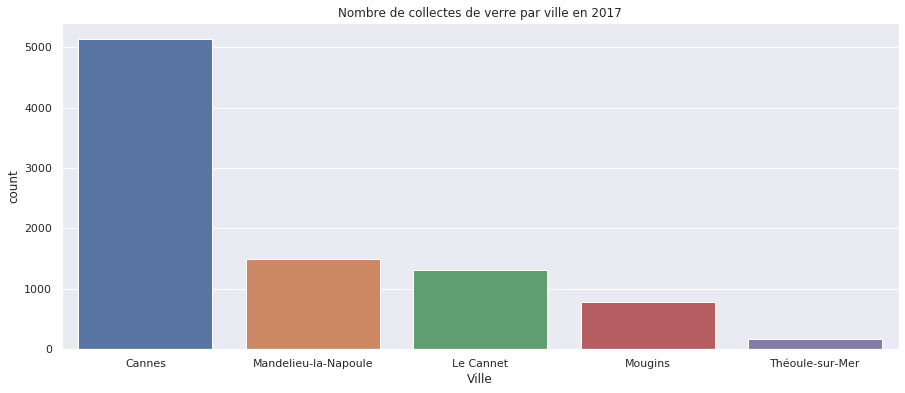

In [328]:
sns.set(style="darkgrid")
plt.figure(figsize= [15, 6])
data17 = data171819[data171819["Année"] == 2017]
plt.title("Nombre de collectes de verre par ville en 2017")
sns.countplot(x="Ville", data=data17, order=data17["Ville"].value_counts().keys())

In [329]:
#graphique.get_figure().savefig("charts/verre/nbCollectesVerreparVille2017.png")

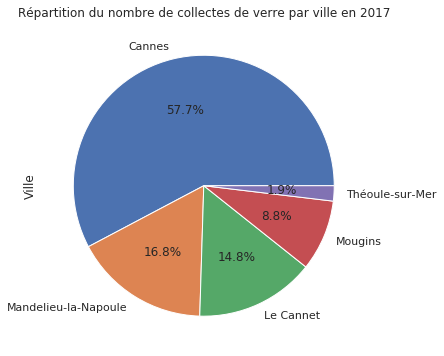

In [330]:
plt.figure(figsize= [15, 6])
plt.title("Répartition du nombre de collectes de verre par ville en 2017")
data17["Ville"].value_counts().plot(kind='pie', autopct='%1.1f%%')

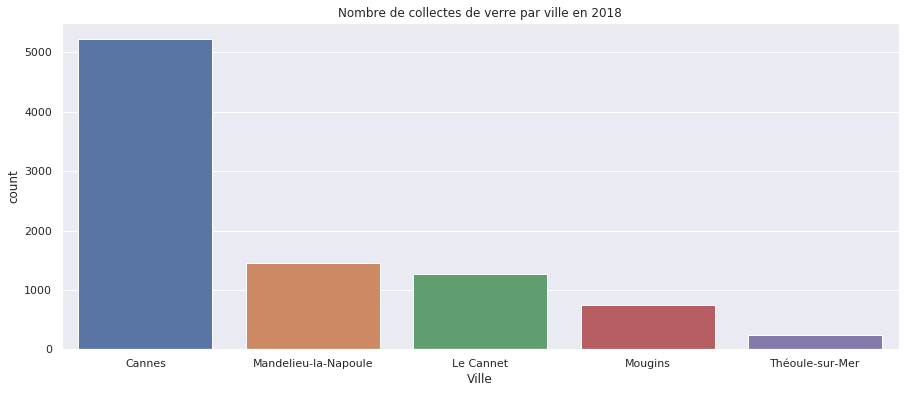

In [331]:
plt.figure(figsize= [15, 6])
data18 = data171819[data171819["Année"] == 2018]
plt.title("Nombre de collectes de verre par ville en 2018")
sns.countplot(x="Ville", data=data18, order=data18["Ville"].value_counts().keys())

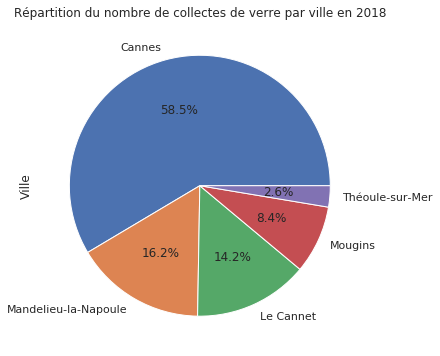

In [332]:
plt.figure(figsize= [15, 6])
plt.title("Répartition du nombre de collectes de verre par ville en 2018")
data18["Ville"].value_counts().plot(kind='pie', autopct='%1.1f%%')

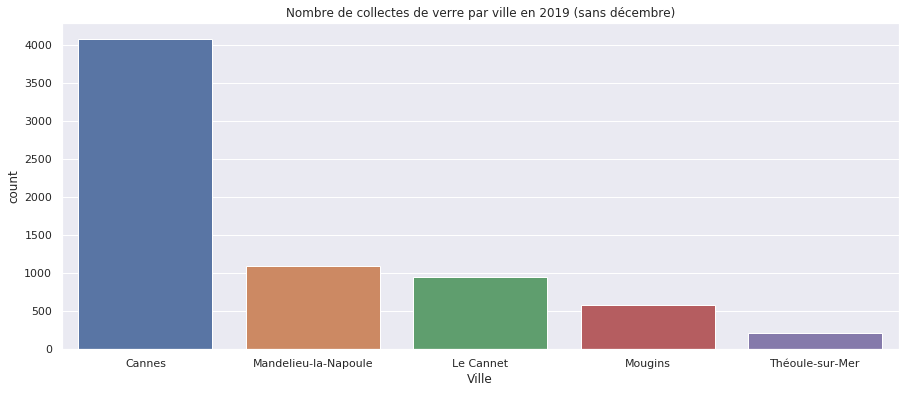

In [333]:
plt.figure(figsize= [15, 6])
data19 = data171819[data171819["Année"] == 2019]
plt.title("Nombre de collectes de verre par ville en 2019 (sans décembre)")
sns.countplot(x="Ville", data=data19, order=data19["Ville"].value_counts().keys())

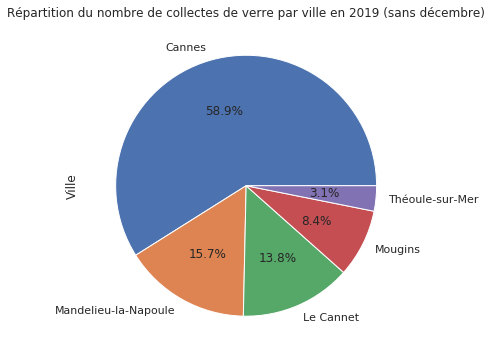

In [334]:
plt.figure(figsize= [15, 6])
plt.title("Répartition du nombre de collectes de verre par ville en 2019 (sans décembre)")
data19["Ville"].value_counts().plot(kind='pie', autopct='%1.1f%%')

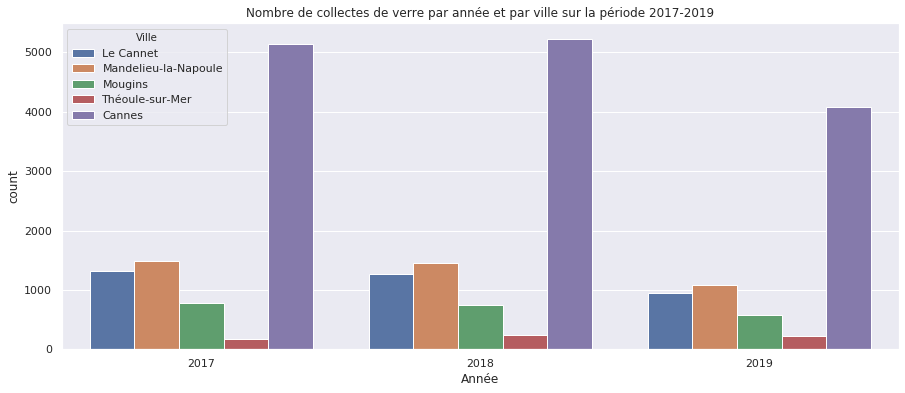

In [335]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par année et par ville sur la période 2017-2019")
sns.countplot(x="Année", hue="Ville", data=data171819)

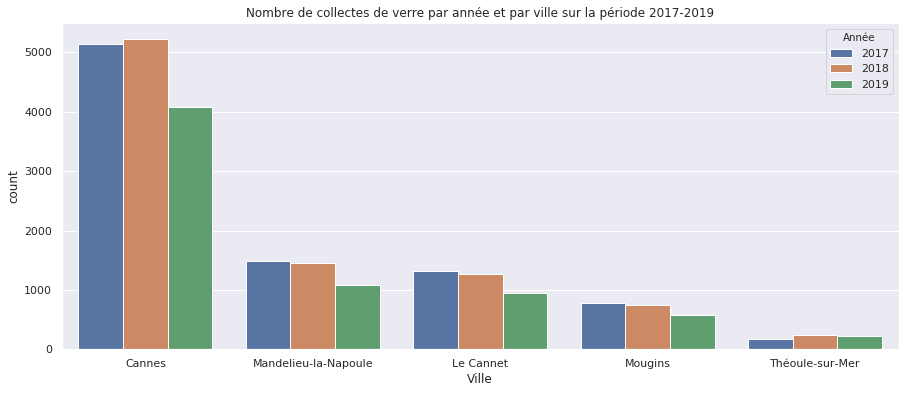

In [336]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par année et par ville sur la période 2017-2019")
sns.countplot(x="Ville", hue="Année", data=data171819, order=data171819['Ville'].value_counts().keys())

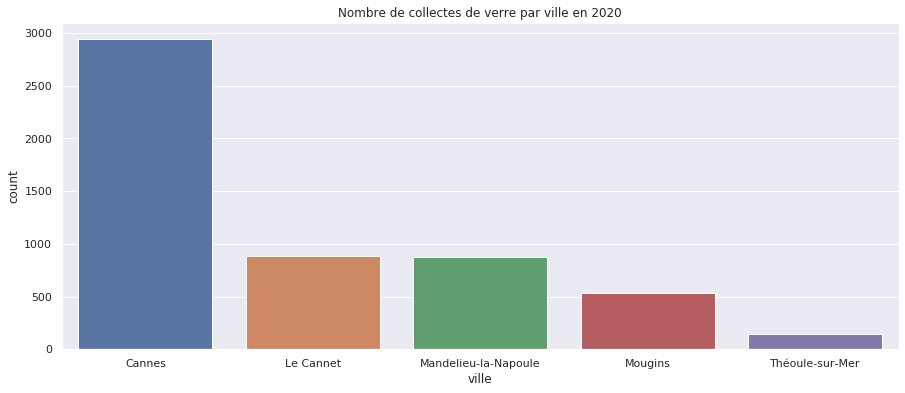

In [337]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par ville en 2020")
sns.countplot(x="ville", data=data20, order=data20["ville"].value_counts().keys())

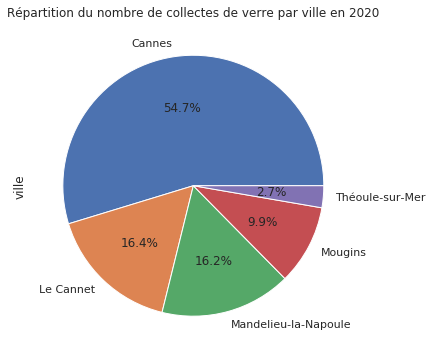

In [338]:
plt.figure(figsize= [15, 6])
plt.title("Répartition du nombre de collectes de verre par ville en 2020")
data20["ville"].value_counts().plot(kind='pie', autopct='%1.1f%%')

## Graphiques sur les nombres de collectes par adresses (regroupées par ville) et par année

### Cannes

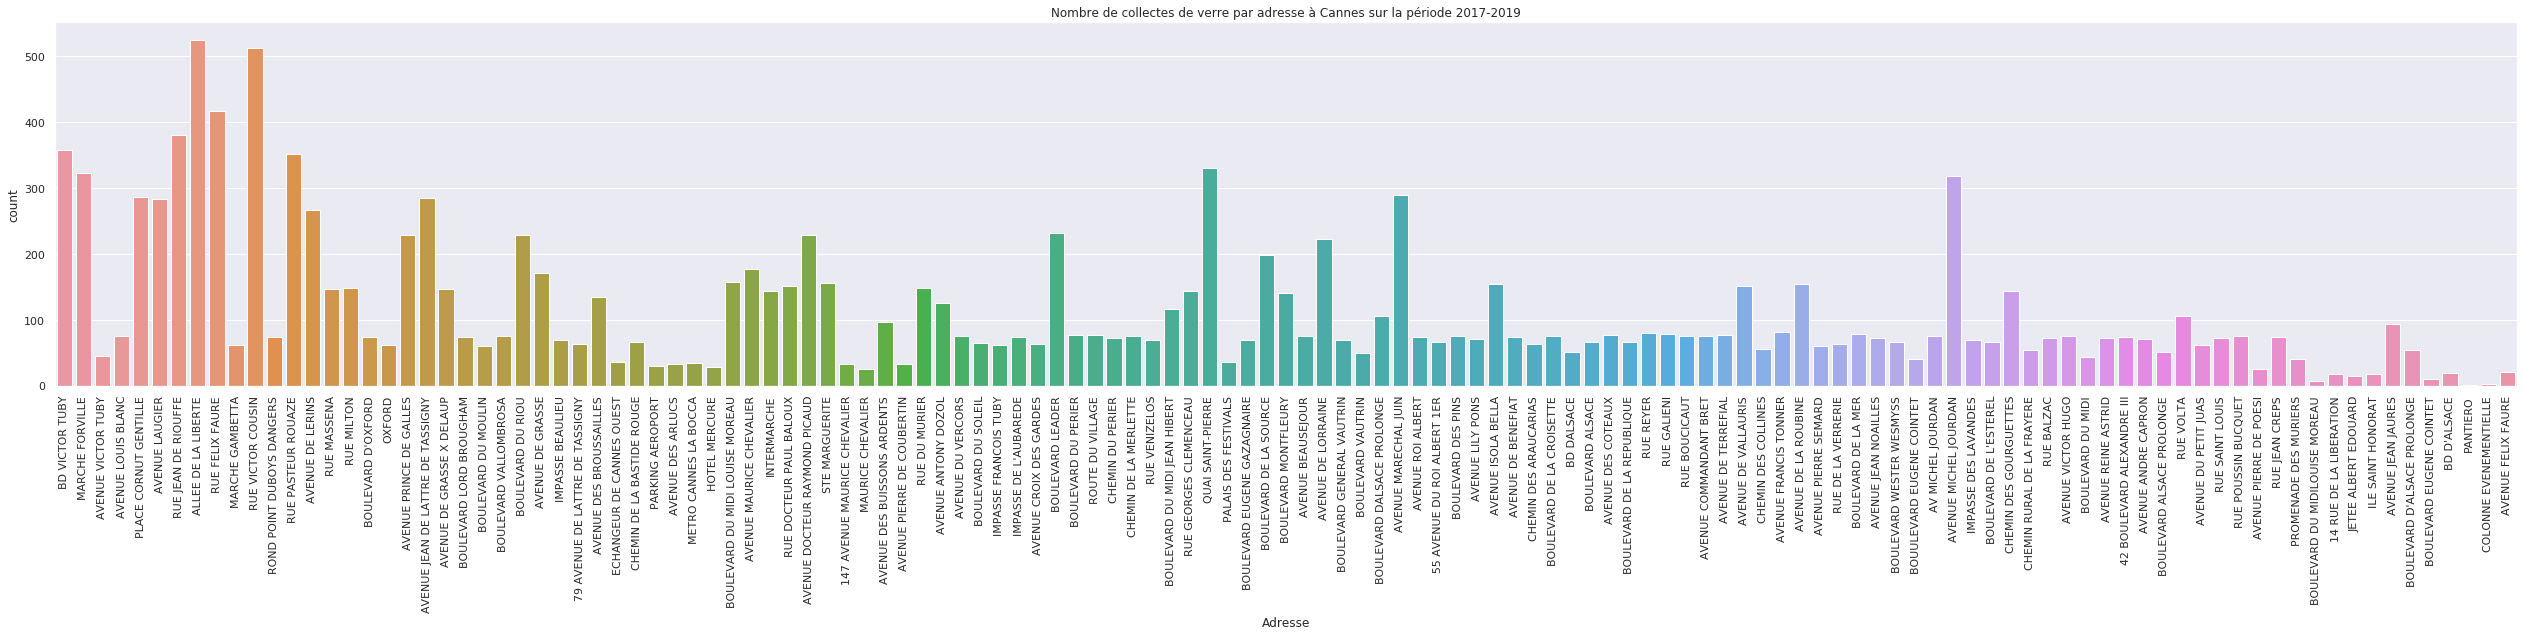

In [339]:
dataCannes171819 = data171819[data171819["Ville"] == "Cannes"]
plt.figure(figsize= [35, 6])
plt.title("Nombre de collectes de verre par adresse à Cannes sur la période 2017-2019")
plt.xticks(rotation=90)
plt.tight_layout()
graphique = sns.countplot(x="Adresse", data=dataCannes171819)
graphique

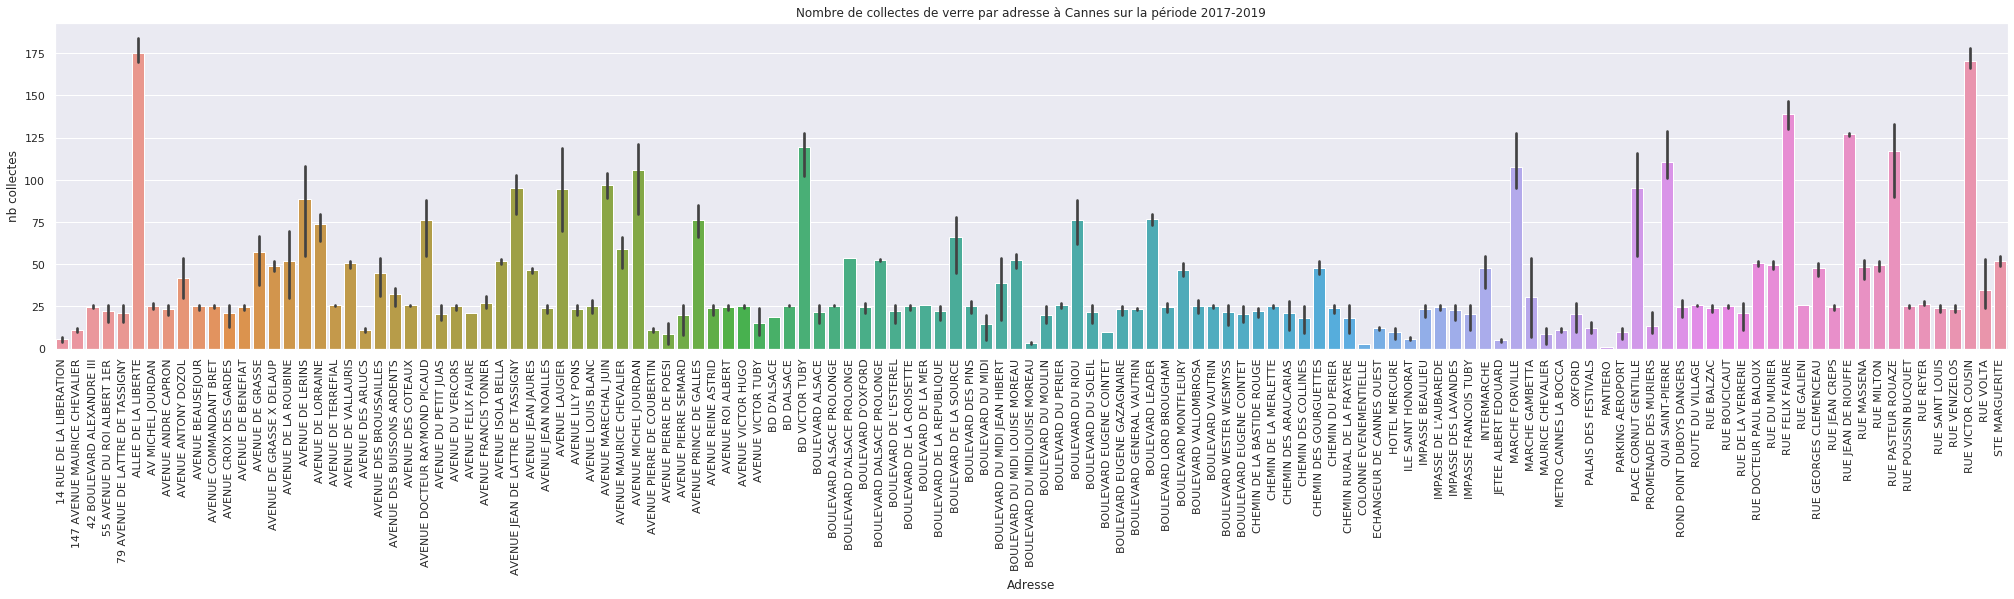

In [340]:
dataCannes171819annee = dataCannes171819.groupby(by=["Adresse", "Année"])["Collecte"].count().reset_index(name="nb collectes")

plt.figure(figsize= [35, 6])
plt.title("Nombre de collectes de verre par adresse à Cannes sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="nb collectes", data=dataCannes171819annee)

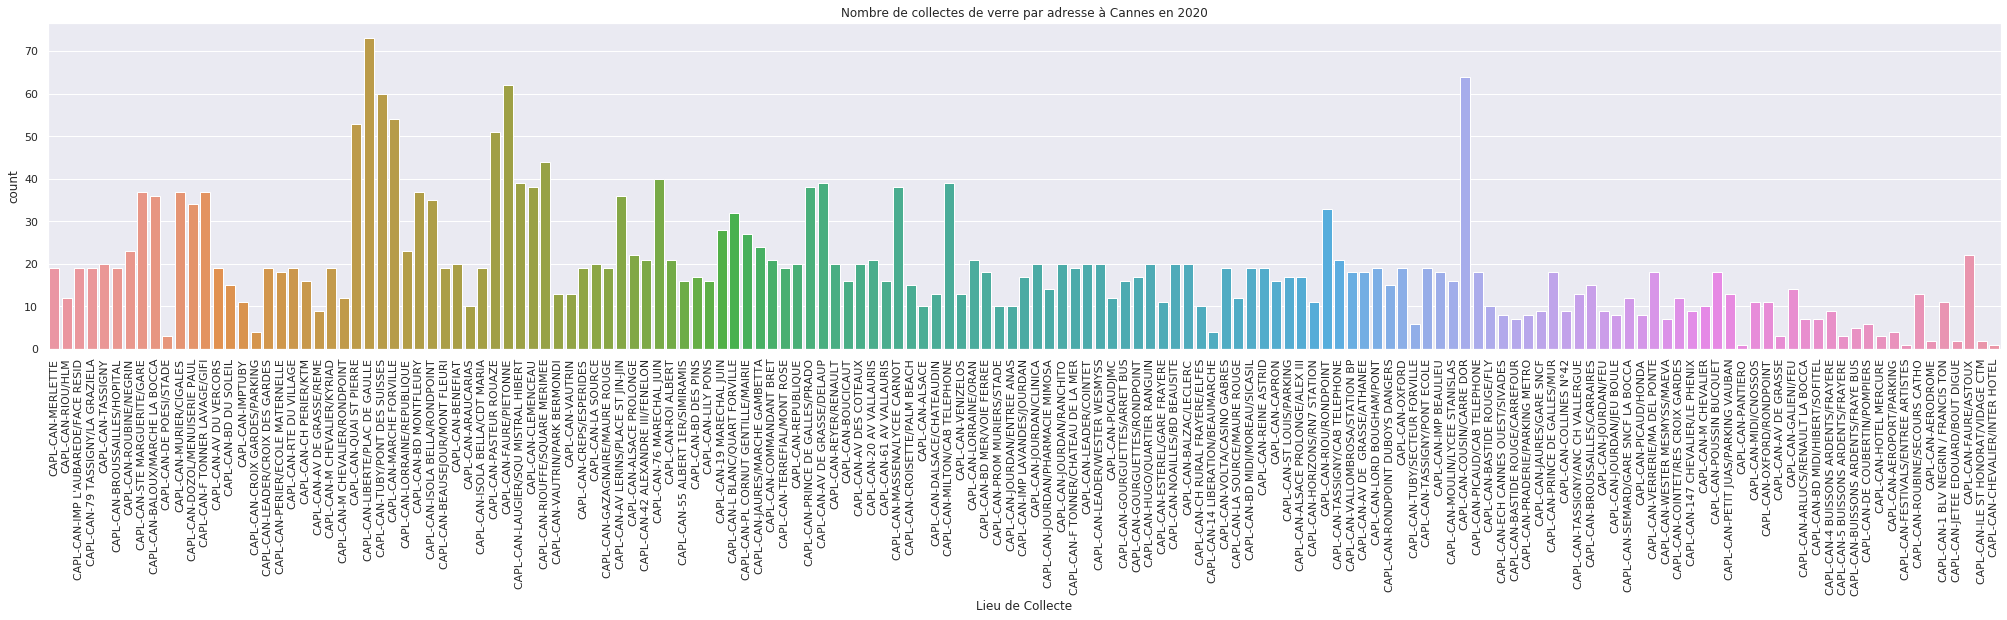

In [341]:
dataCannes20 = data20[data20["ville"] == "Cannes"]
plt.figure(figsize= [35, 6])
plt.title("Nombre de collectes de verre par adresse à Cannes en 2020")
plt.xticks(rotation=90)
sns.countplot(x="Lieu de Collecte", data=dataCannes20)

### Le Cannet

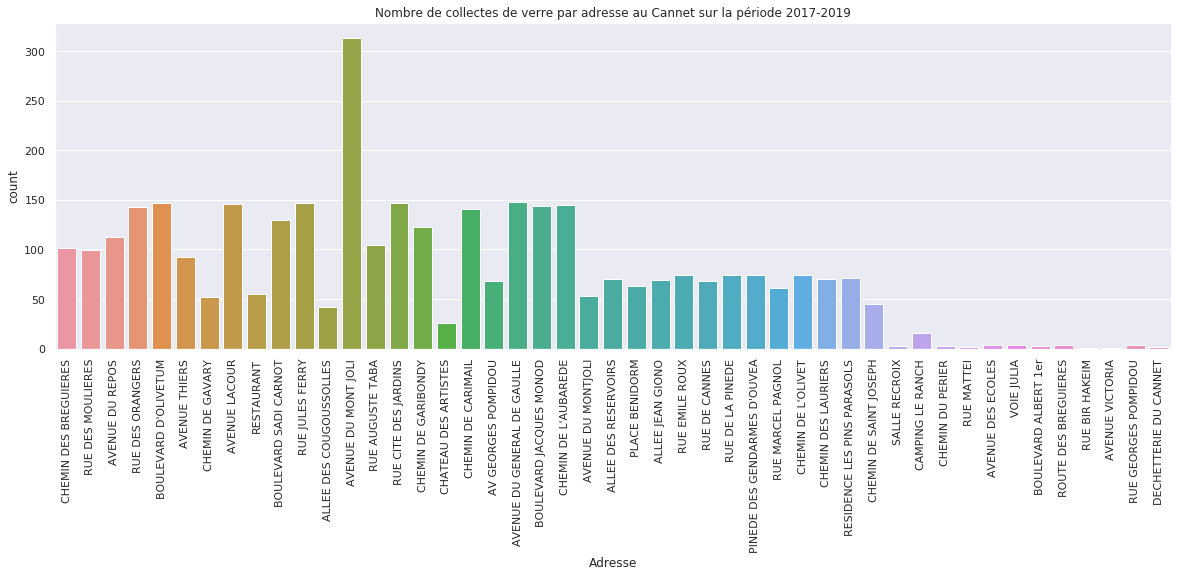

In [342]:
dataCannet171819 = data171819[data171819["Ville"] == "Le Cannet"]
plt.figure(figsize= [20, 6])
plt.title("Nombre de collectes de verre par adresse au Cannet sur la période 2017-2019")
plt.xticks(rotation=90)
sns.countplot(x="Adresse", data=dataCannet171819)

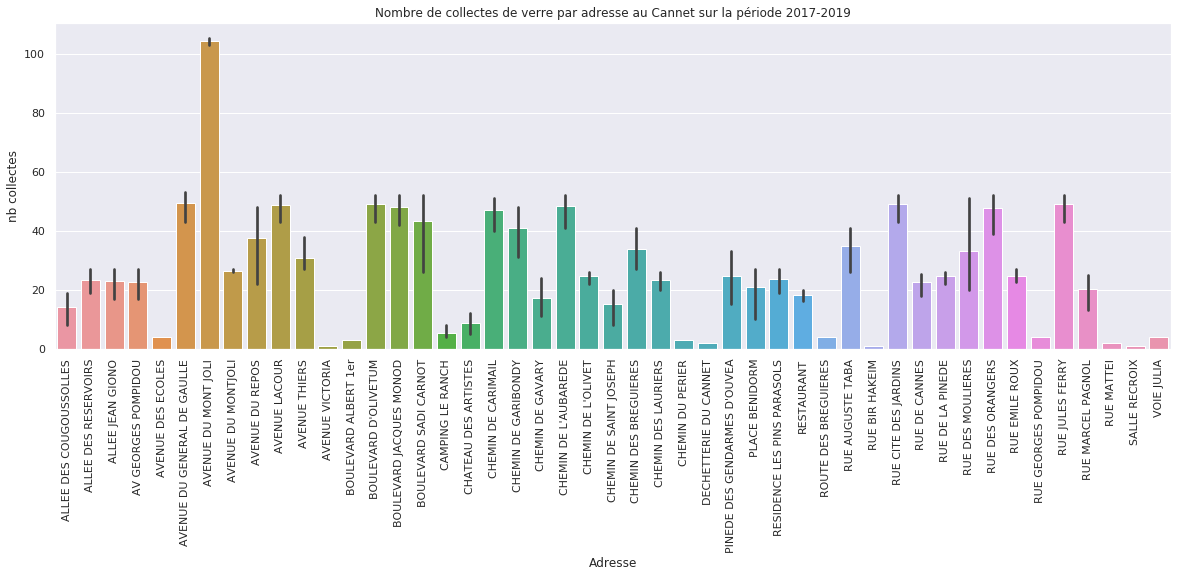

In [343]:
dataCannet171819annee = dataCannet171819.groupby(by=["Adresse", "Année"])["Collecte"].count().reset_index(name="nb collectes")

plt.figure(figsize= [20, 6])
plt.title("Nombre de collectes de verre par adresse au Cannet sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="nb collectes", data=dataCannet171819annee)

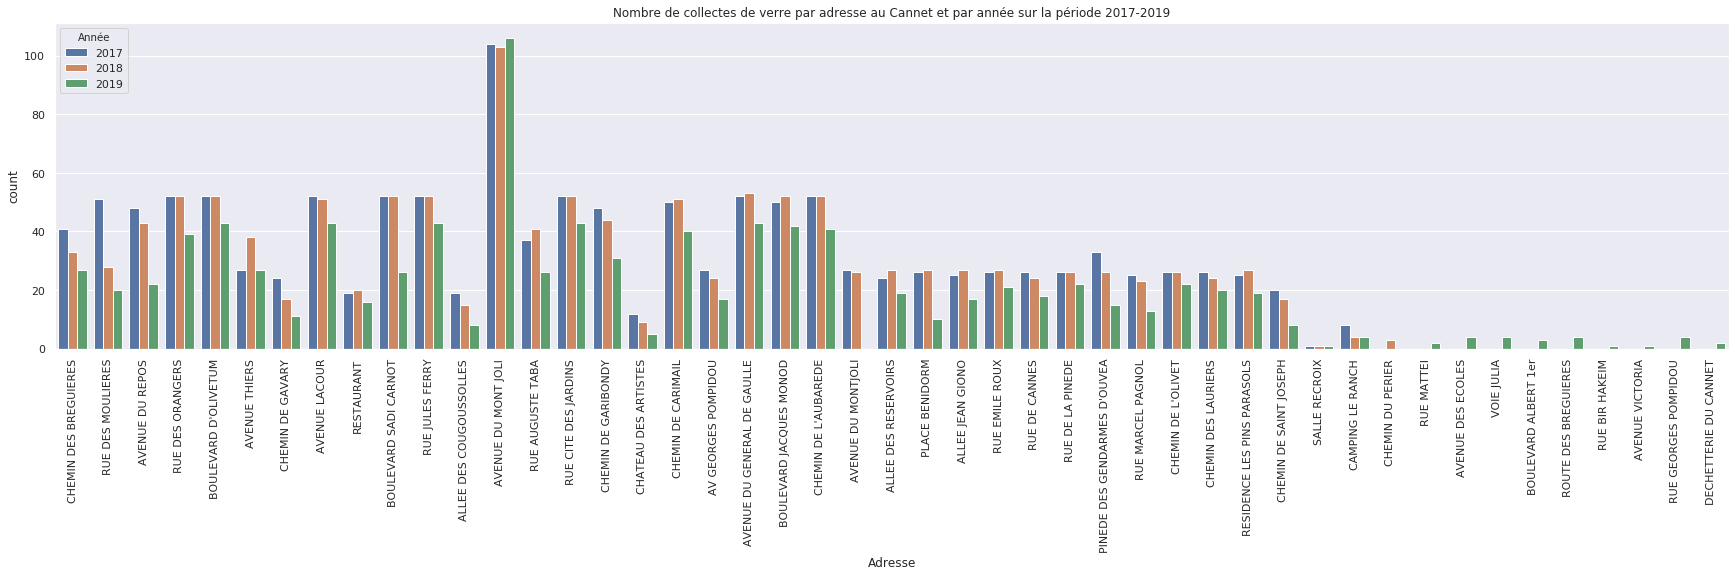

In [344]:
plt.figure(figsize= [30, 6])
plt.title("Nombre de collectes de verre par adresse au Cannet et par année sur la période 2017-2019")
plt.xticks(rotation=90)
sns.countplot(x="Adresse", data=dataCannet171819, hue="Année")

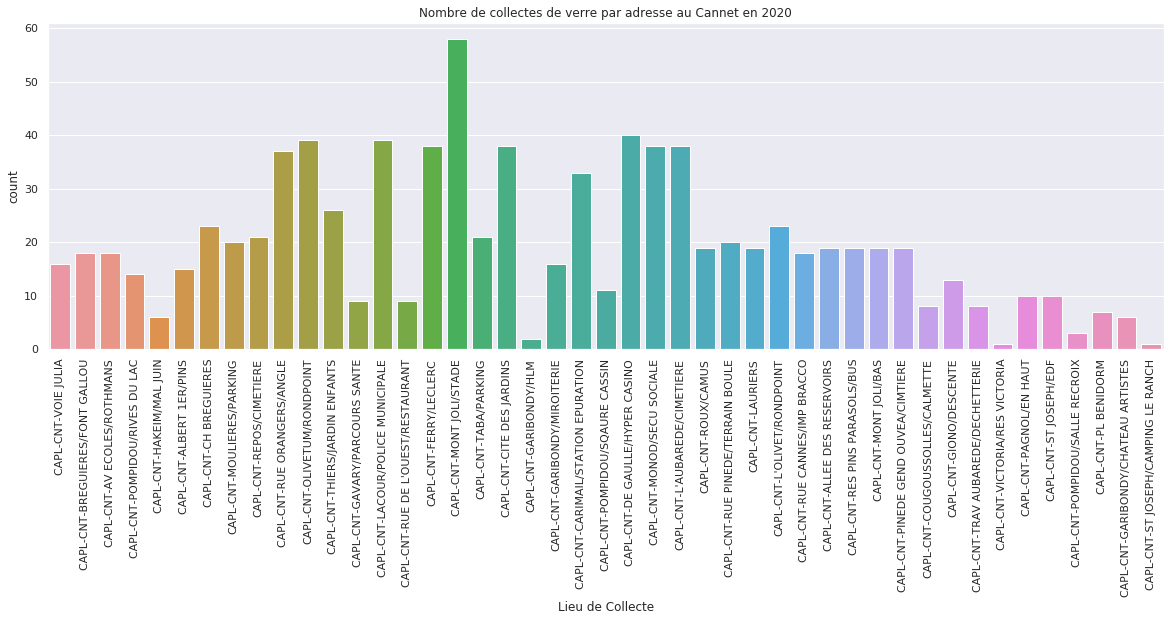

In [345]:
dataCannet20 = data20[data20["ville"] == "Le Cannet"]
plt.figure(figsize= [20, 6])
plt.title("Nombre de collectes de verre par adresse au Cannet en 2020")
plt.xticks(rotation=90)
sns.countplot(x="Lieu de Collecte", data=dataCannet20)

### Mandelieu-la-Napoule

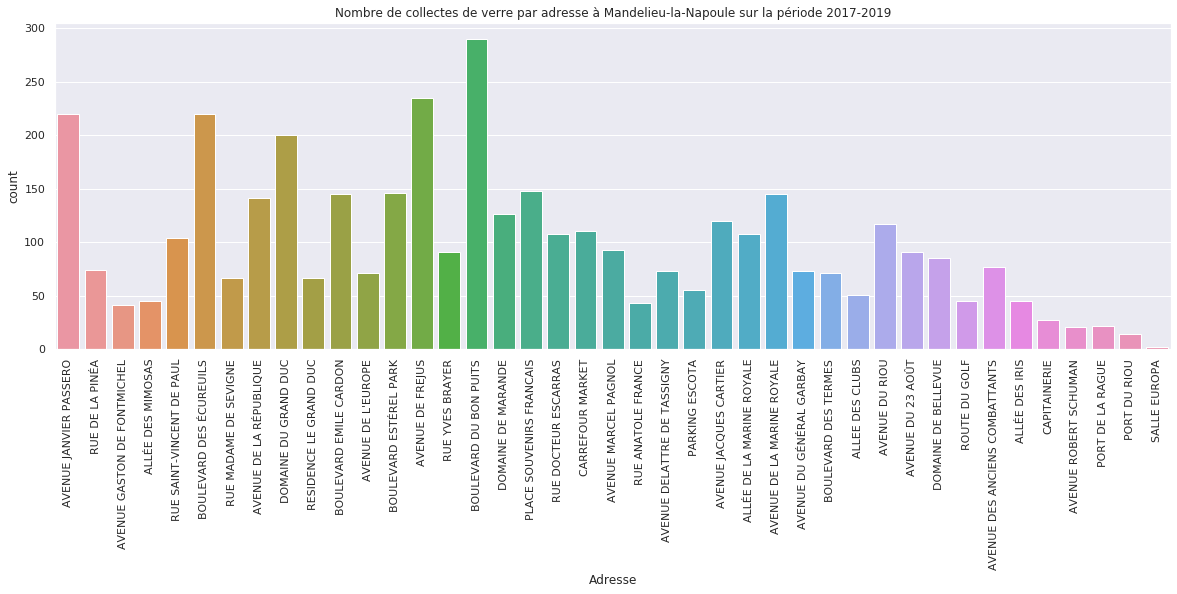

In [346]:
dataMandelieu171819 = data171819[data171819["Ville"] == "Mandelieu-la-Napoule"]
plt.figure(figsize= [20, 6])
plt.title("Nombre de collectes de verre par adresse à Mandelieu-la-Napoule sur la période 2017-2019")
plt.xticks(rotation=90)
sns.countplot(x="Adresse", data=dataMandelieu171819)

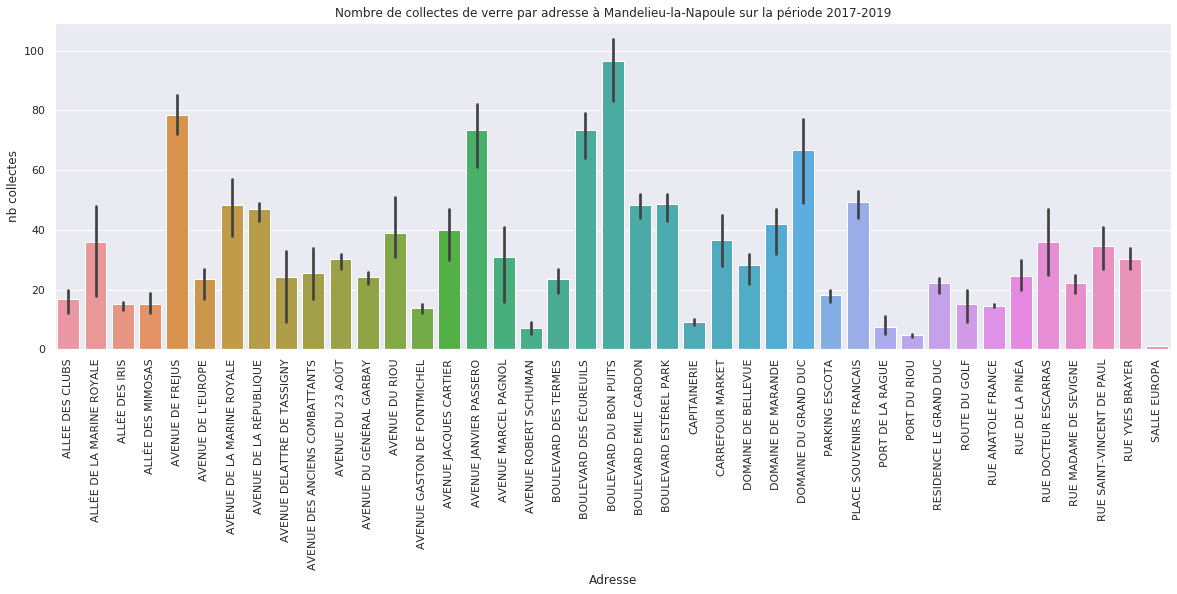

In [347]:
dataMandelieu171819annee = dataMandelieu171819.groupby(by=["Adresse", "Année"])["Collecte"].count().reset_index(name="nb collectes")

plt.figure(figsize= [20, 6])
plt.title("Nombre de collectes de verre par adresse à Mandelieu-la-Napoule sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="nb collectes", data=dataMandelieu171819annee)

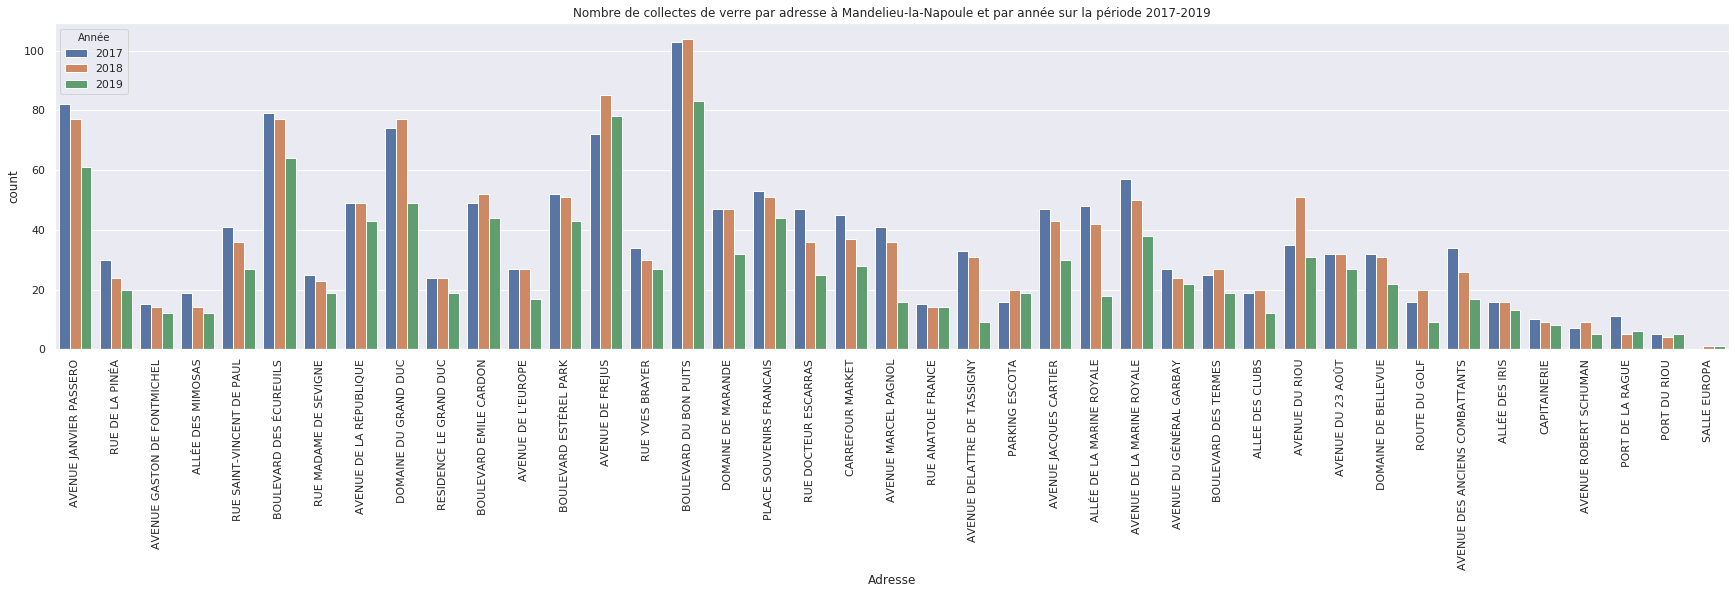

In [348]:
plt.figure(figsize= [30, 6])
plt.title("Nombre de collectes de verre par adresse à Mandelieu-la-Napoule et par année sur la période 2017-2019")
plt.xticks(rotation=90)
sns.countplot(x="Adresse", data=dataMandelieu171819, hue="Année")

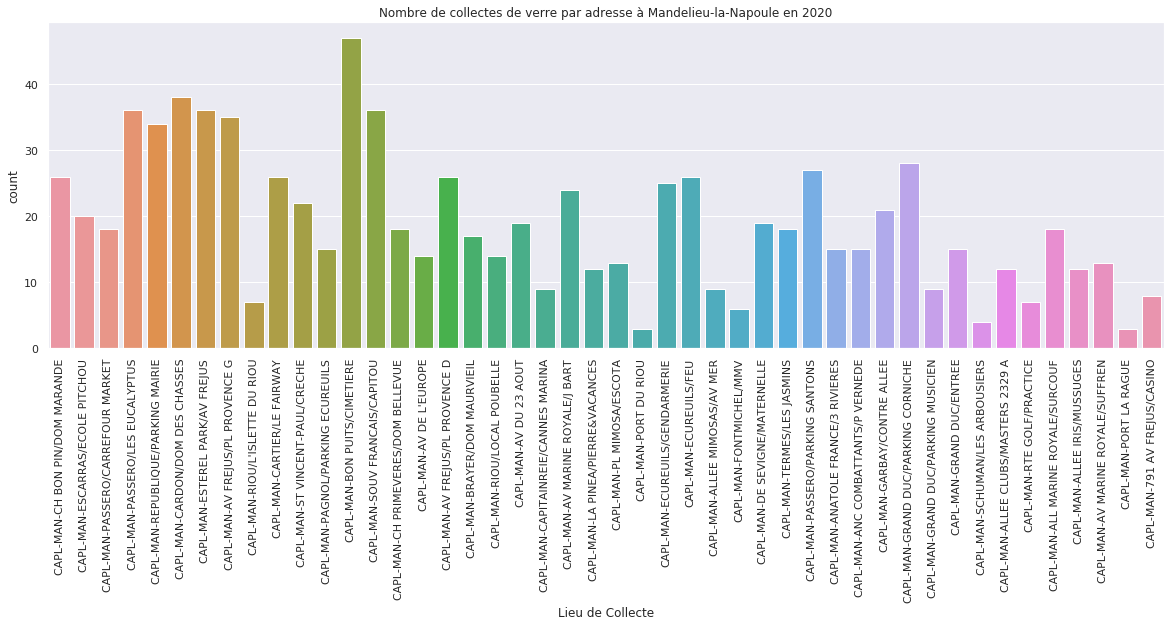

In [349]:
dataMandelieu20 = data20[data20["ville"] == "Mandelieu-la-Napoule"]
plt.figure(figsize= [20, 6])
plt.title("Nombre de collectes de verre par adresse à Mandelieu-la-Napoule en 2020")
plt.xticks(rotation=90)
sns.countplot(x="Lieu de Collecte", data=dataMandelieu20)

### Mougins

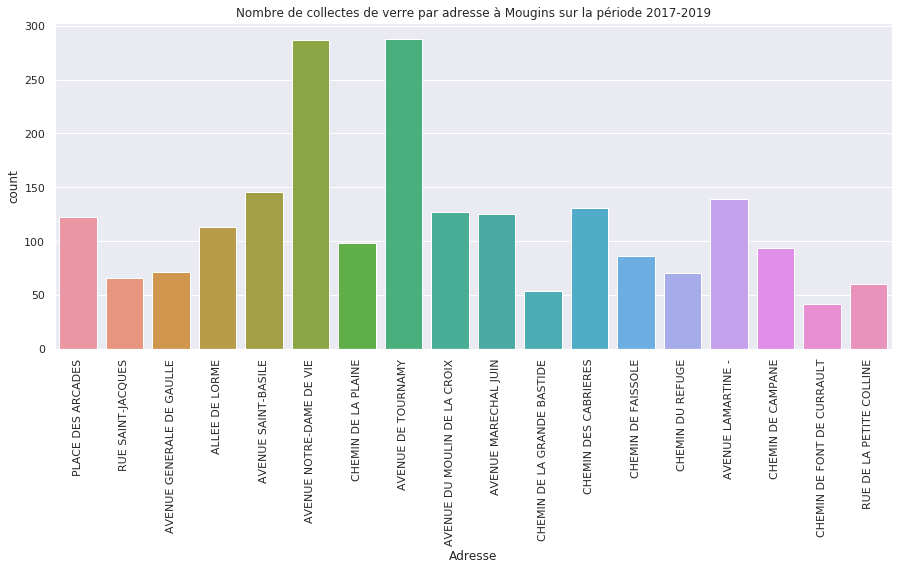

In [350]:
dataMougins171819 = data171819[data171819["Ville"] == "Mougins"]
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par adresse à Mougins sur la période 2017-2019")
plt.xticks(rotation=90)
sns.countplot(x="Adresse", data=dataMougins171819)

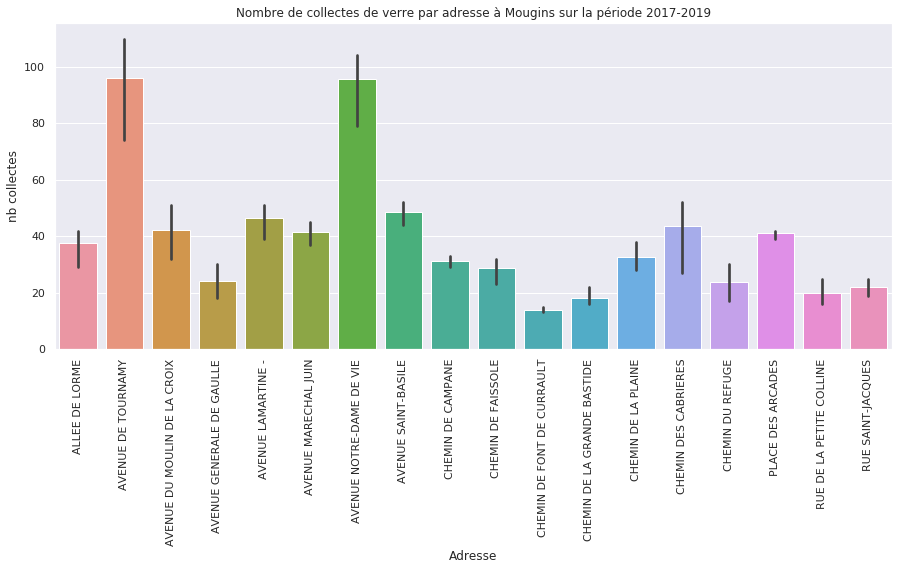

In [351]:
dataMougins171819annee = dataMougins171819.groupby(by=["Adresse", "Année"])["Collecte"].count().reset_index(name="nb collectes")

plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par adresse à Mougins sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="nb collectes", data=dataMougins171819annee)

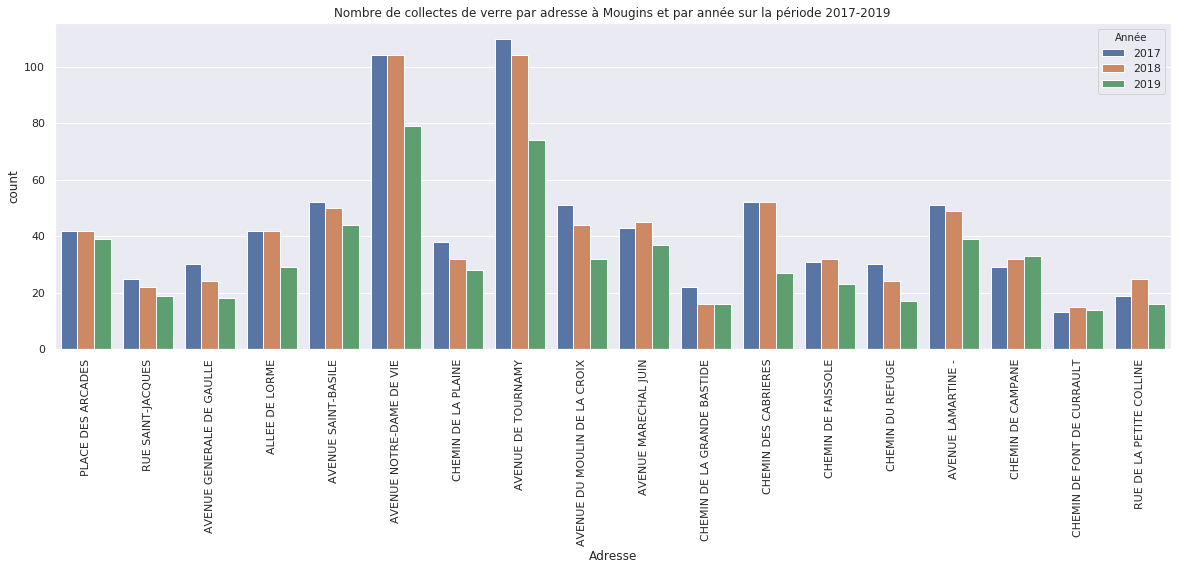

In [352]:
plt.figure(figsize= [20, 6])
plt.title("Nombre de collectes de verre par adresse à Mougins et par année sur la période 2017-2019")
plt.xticks(rotation=90)
sns.countplot(x="Adresse", data=dataMougins171819, hue="Année")

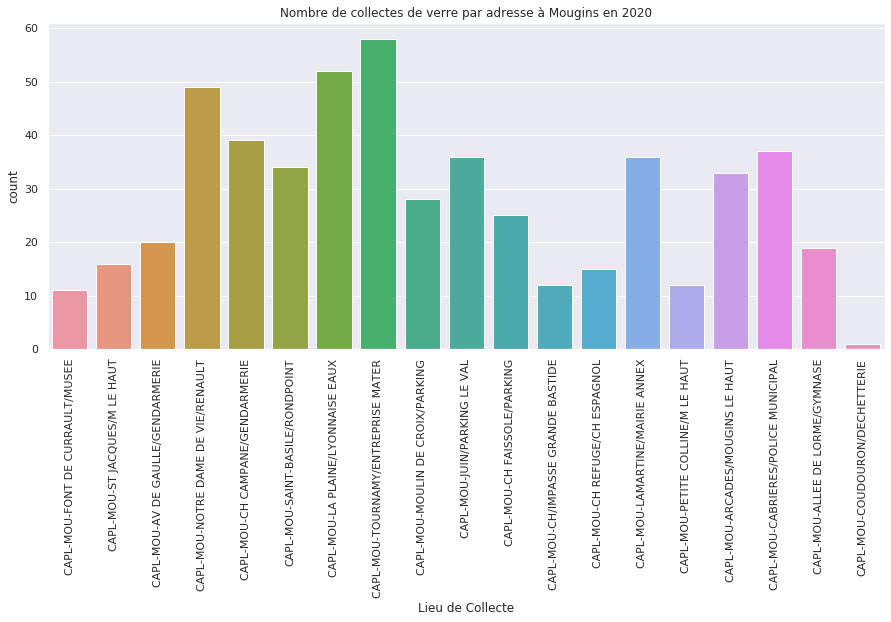

In [353]:
dataMougins20 = data20[data20["ville"] == "Mougins"]
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par adresse à Mougins en 2020")
plt.xticks(rotation=90)
sns.countplot(x="Lieu de Collecte", data=dataMougins20)

### Théoule-sur-Mer

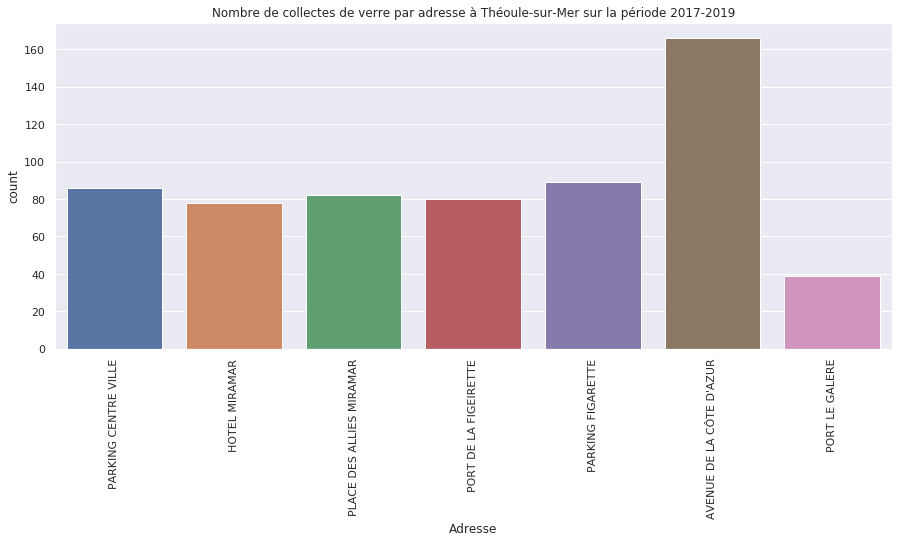

In [354]:
dataTheoule171819 = data171819[data171819["Ville"] == "Théoule-sur-Mer"]
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par adresse à Théoule-sur-Mer sur la période 2017-2019")
plt.xticks(rotation=90)
sns.countplot(x="Adresse", data=dataTheoule171819)

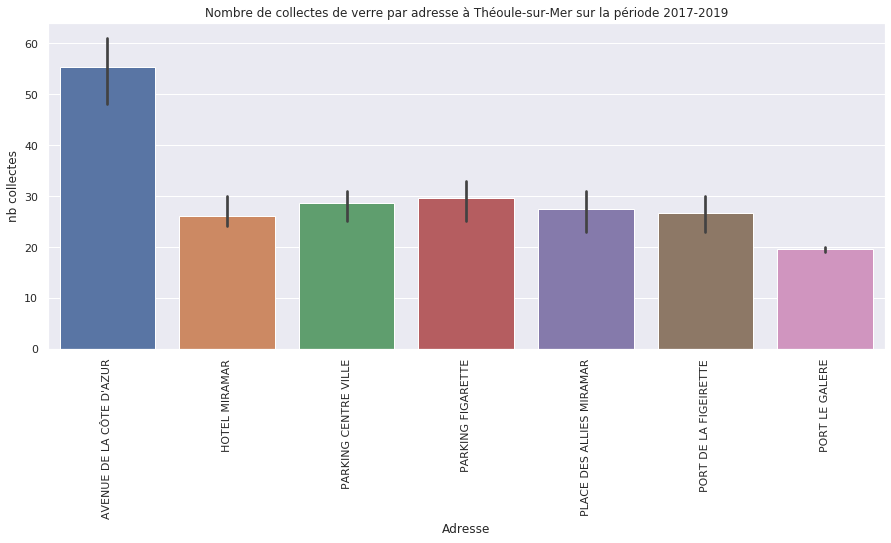

In [355]:
dataTheoule171819annee = dataTheoule171819.groupby(by=["Adresse", "Année"])["Collecte"].count().reset_index(name="nb collectes")

plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par adresse à Théoule-sur-Mer sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="nb collectes", data=dataTheoule171819annee)

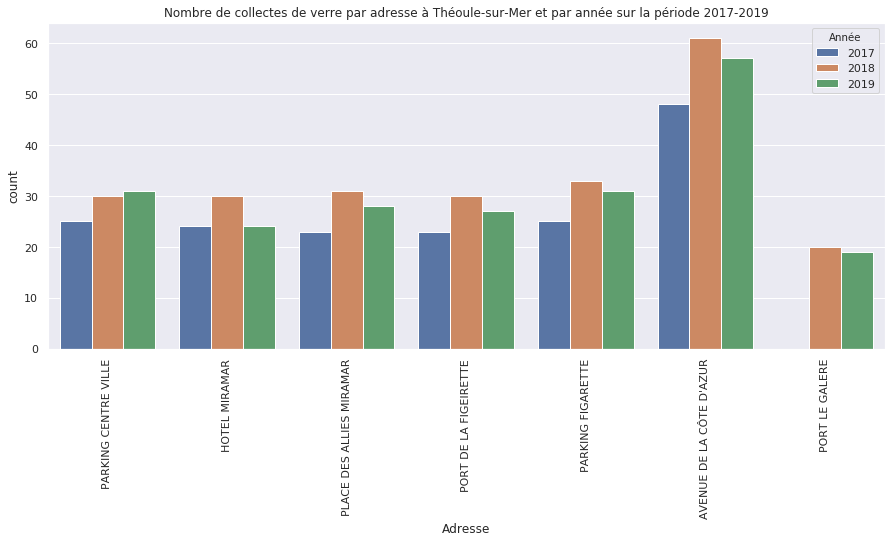

In [356]:
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par adresse à Théoule-sur-Mer et par année sur la période 2017-2019")
plt.xticks(rotation=90)
sns.countplot(x="Adresse", data=dataTheoule171819, hue="Année")

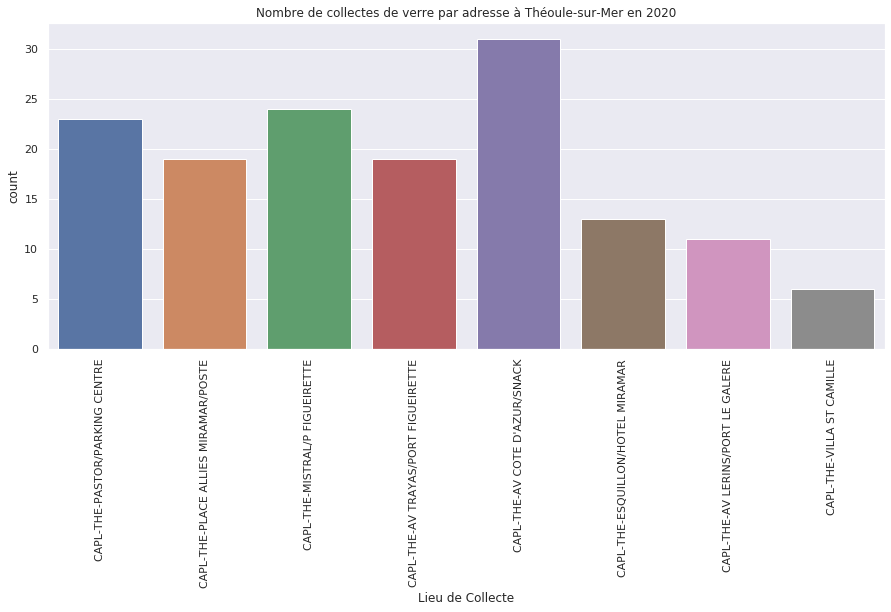

In [357]:
dataTheoule20 = data20[data20["ville"] == "Théoule-sur-Mer"]
plt.figure(figsize= [15, 6])
plt.title("Nombre de collectes de verre par adresse à Théoule-sur-Mer en 2020")
plt.xticks(rotation=90)
sns.countplot(x="Lieu de Collecte", data=dataTheoule20)

## Graphiques sur les nombres de collectes par mois (par année) et par ville

Text(0.5, 1.0, 'Nombre de collectes de verre par mois et par ville en 2017')

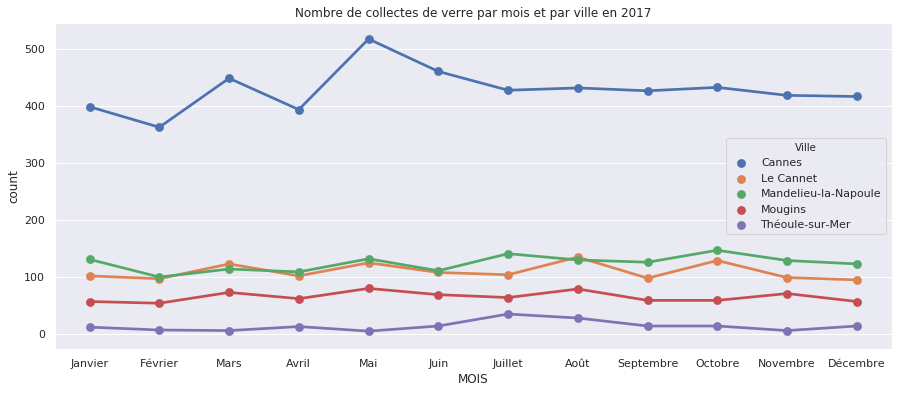

In [358]:
listeMois = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

data17mois = data17.groupby(by=["MOIS", "Ville"]).size().reset_index(name="count")

plt.figure(figsize= [15, 6])
sns.pointplot(x="MOIS", y="count", hue="Ville", data=data17mois, order=listeMois)
plt.title("Nombre de collectes de verre par mois et par ville en 2017")

Text(0.5, 1.0, 'Nombre de collectes de verre par mois et par ville en 2018')

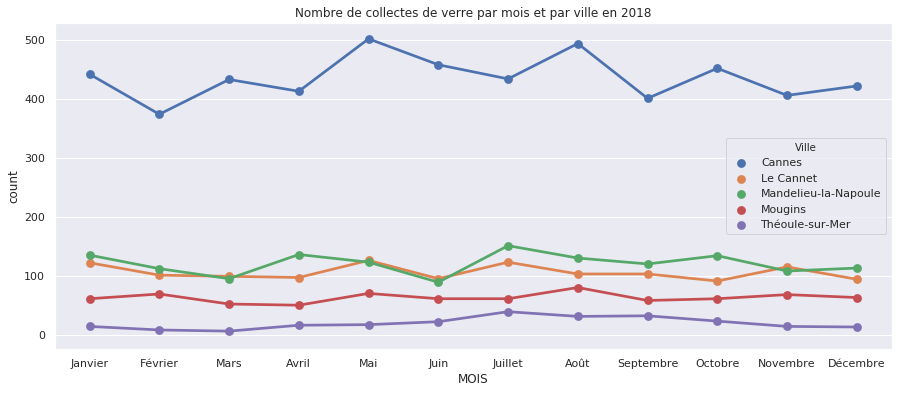

In [359]:
data18mois = data18.groupby(by=["MOIS", "Ville"]).size().reset_index(name="count")

plt.figure(figsize= [15, 6])
sns.pointplot(x="MOIS", y="count", hue="Ville", data=data18mois, order=listeMois)
plt.title("Nombre de collectes de verre par mois et par ville en 2018")

Text(0.5, 1.0, 'Nombre de collectes de verre par mois et par ville en 2019')

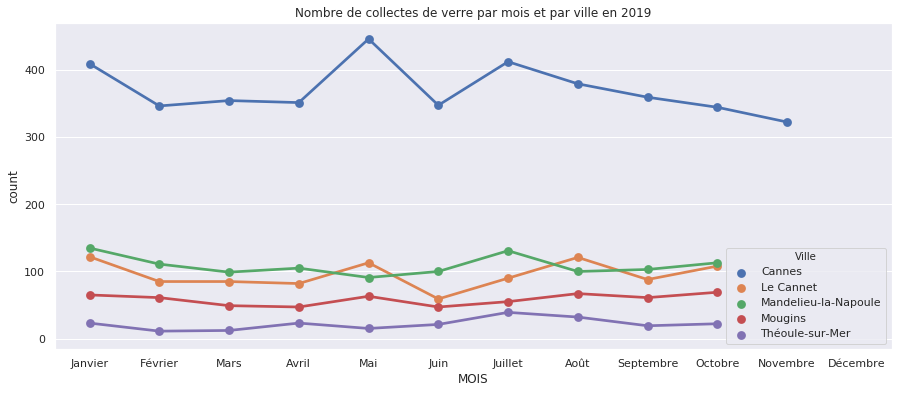

In [360]:
data19mois = data19.groupby(by=["MOIS", "Ville"]).size().reset_index(name="count")

plt.figure(figsize= [15, 6])
sns.pointplot(x="MOIS", y="count", hue="Ville", data=data19mois, order=listeMois)
plt.title("Nombre de collectes de verre par mois et par ville en 2019")

Text(0.5, 1.0, 'Nombre de collectes de verre par mois et par ville pour la période 2017-2019')

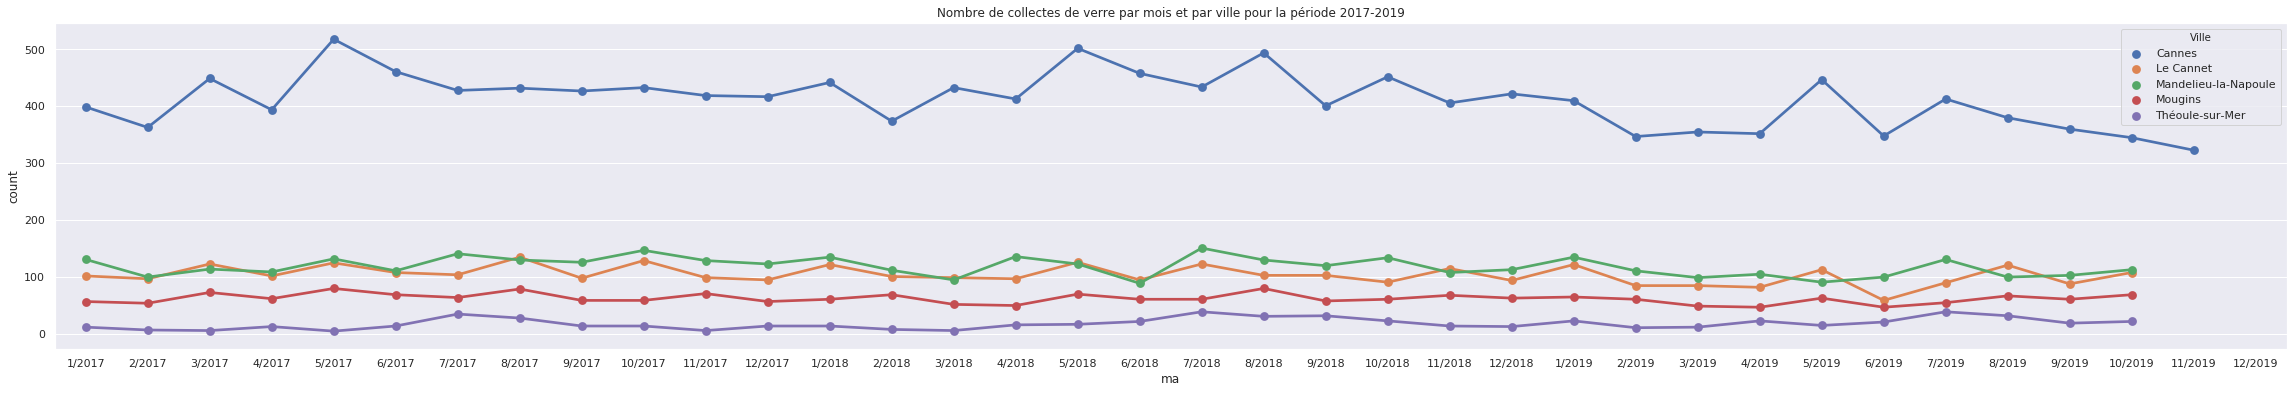

In [361]:
"""
listeMA = [mois + " " + str(annee) for annee in [2017, 2018, 2019] for mois in listeMois]

for i in data171819.index:
    data171819.loc[i, "ma"] = data171819.loc[i, "MOIS"] + " " + str(data171819.loc[i, "Année"])
"""
dictMois = {cle: val for cle, val in zip(listeMois, range(1, 13))} 
listeMA = [str(mois)+ "/" + str(annee) for annee in range(2017, 2020) for mois in range(1,13)]

for i in data171819.index:
    data171819.loc[i, "ma"] = str(dictMois[data171819.loc[i, "MOIS"]]) + "/" + str(data171819.loc[i, "Année"])

data171819mois = data171819.groupby(by=["ma", "Ville"]).size().reset_index(name="count")

plt.figure(figsize= [40, 6])
sns.pointplot(x="ma", y="count", hue="Ville", data=data171819mois, order=listeMA)
plt.title("Nombre de collectes de verre par mois et par ville pour la période 2017-2019")

Text(0.5, 1.0, 'Nombre de collectes de verre par mois et par ville en 2020')

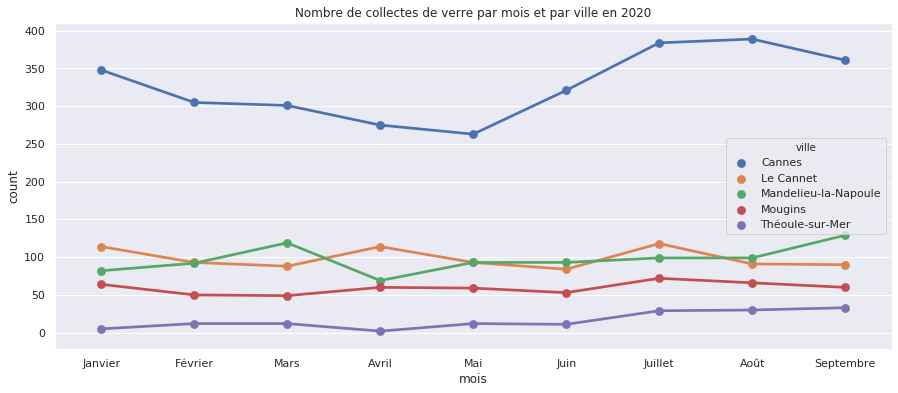

In [362]:
data20["mois"] = pd.to_datetime(data20["Date de réalisation"]).dt.month
for i in data20.index:
    data20.loc[i, "mois"] = listeMois[data20.loc[i, "mois"] - 1]
data20mois = data20.groupby(by=["mois", "ville"]).size().reset_index(name="count")

plt.figure(figsize= [15, 6])
sns.pointplot(x="mois", y="count", hue="ville", data=data20mois, order=listeMois[:9])
plt.title("Nombre de collectes de verre par mois et par ville en 2020")

In [363]:
data20

Prestation Date de réalisation                 Lieu de Collecte  \
0     12001054939          2020-01-02              CAPL-CNT-VOIE JULIA   
1     12001054940          2020-01-02  CAPL-CNT-BREGUIERES/FONT GALLOU   
2     12001054941          2020-01-02      CAPL-CNT-AV ECOLES/ROTHMANS   
3     12001054942          2020-01-02                CAPL-CAN-MERLETTE   
4     12001054943          2020-01-02                CAPL-CAN-RIOU/HLM   
...           ...                 ...                              ...   
5471  12009697556          2020-09-30   CAPL-CAN-GOURGUETTES/RONDPOINT   
5472  12009697557          2020-09-30   CAPL-CAN-GOURGUETTES/ARRET BUS   
5473  12009697554          2020-09-30          CAPL-CAN-BALZAC/LECLERC   
5474  12009697559          2020-09-30     CAPL-CAN-JOURDAN/ENTREE ANAS   
5475  12009697558          2020-09-30        CAPL-CAN-JOURDAN/RANCHITO   

                     Matériel  Poids      ville       mois  
0              COLONNE K 3 m3    436  Le Cannet    Janvier  
1              COLONNE K 3 m3    436  Le Cannet    Janvier  
2              COLONNE K 3 m3    436  Le Cannet    Janvier  
3            COLONNE K 2,5 m3    545     Cannes    Janvier  
4              COLONNE K 4 m3    581     Cannes    Janvier  
...                       ...    ...        ...        ...  
5471           COLONNE K 3 m3    180     Cannes  Septembre  
5472  COLONNE ENTERREE K 4 m3    240     Cannes  Septembre  
5473           COLONNE K 3 m3    360     Cannes  Septembre  
5474           COLONNE K 3 m3    180     Cannes  Septembre  
5475           COLONNE K 3 m3    180     Cannes  Septembre  

[5386 rows x 7 columns]

## Graphiques sur les nombres de collectes par jour (par année) et par ville
Peu lisible

Text(0.5, 1.0, 'Nombre de collectes de verre par jour et par ville en 2020')

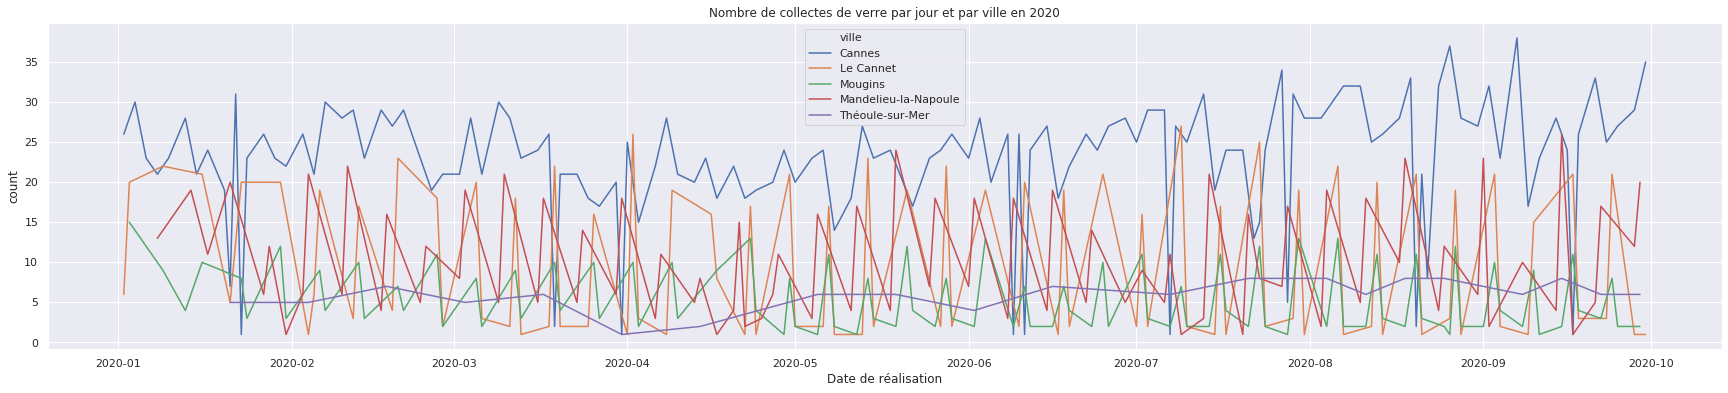

In [364]:
data20["Date de réalisation"] = pd.to_datetime(data20["Date de réalisation"]).dt.date
data20jour = data20.groupby(by=["Date de réalisation", "ville"]).size().reset_index(name="count")

plt.figure(figsize= [30, 6])
sns.lineplot(x="Date de réalisation", y="count", hue="ville", data=data20jour)
plt.title("Nombre de collectes de verre par jour et par ville en 2020")

## Graphiques sur les poids collectés par ville et par année

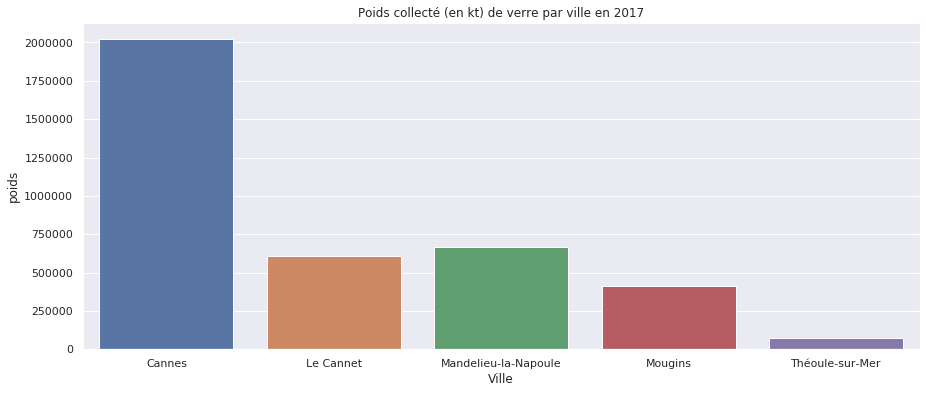

In [365]:
data17poids = data17.groupby(by=["Ville"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kt) de verre par ville en 2017")
sns.barplot(x="Ville", y="poids", data=data17poids)

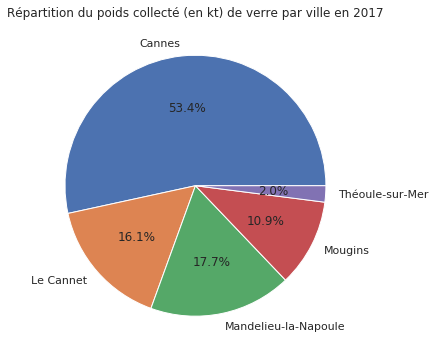

In [366]:
plt.figure(figsize= [15, 6])
plt.title("Répartition du poids collecté (en kt) de verre par ville en 2017")
plt.pie(x=data17poids["poids"], labels=data17poids["Ville"], autopct='%1.1f%%')
plt.show()

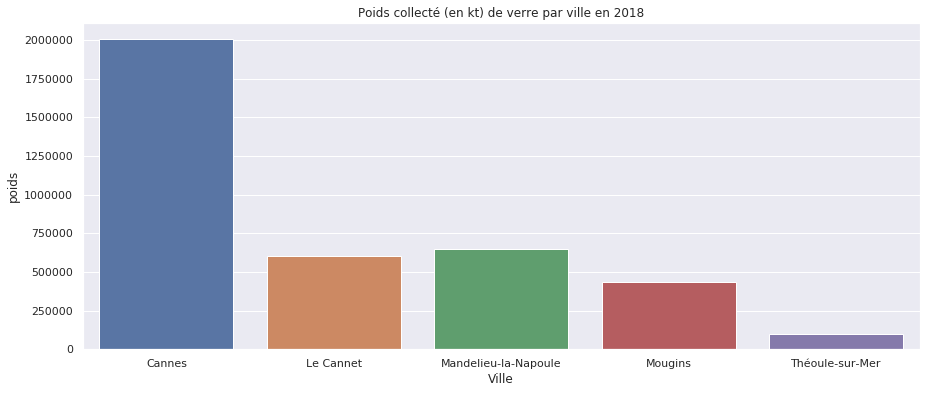

In [367]:
data18poids = data18.groupby(by=["Ville"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kt) de verre par ville en 2018")
sns.barplot(x="Ville", y="poids", data=data18poids)

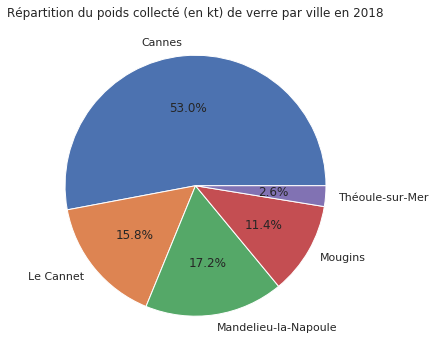

In [368]:
plt.figure(figsize= [15, 6])
plt.title("Répartition du poids collecté (en kt) de verre par ville en 2018")
plt.pie(x=data18poids["poids"], labels=data18poids["Ville"], autopct='%1.1f%%')
plt.show()

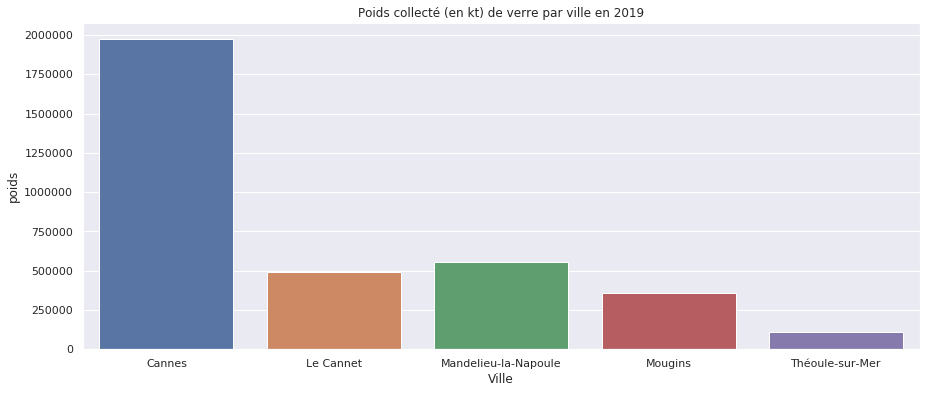

In [369]:
data19poids = data19.groupby(by=["Ville"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kt) de verre par ville en 2019")
sns.barplot(x="Ville", y="poids", data=data19poids)

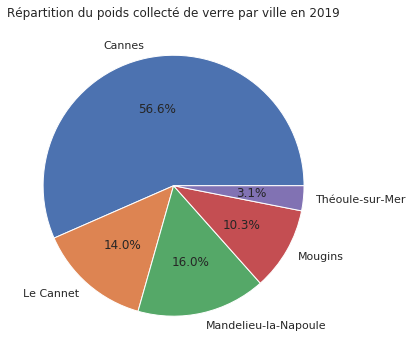

In [370]:
plt.figure(figsize= [15, 6])
plt.title("Répartition du poids collecté de verre par ville en 2019")
plt.pie(x=data19poids["poids"], labels=data19poids["Ville"], autopct='%1.1f%%')
plt.show()

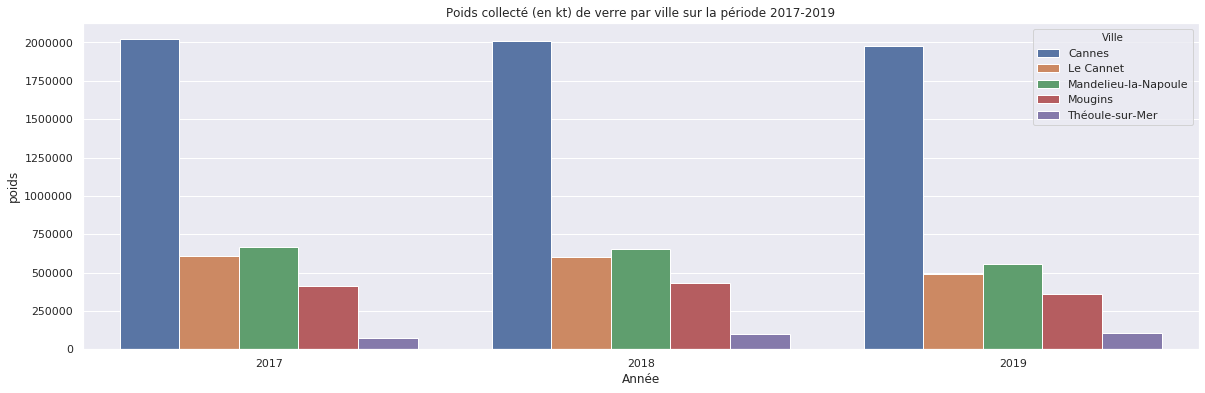

In [371]:
data171819poids = data171819.groupby(by=["Ville", "Année"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [20, 6])
plt.title("Poids collecté (en kt) de verre par ville sur la période 2017-2019")
sns.barplot(x="Année", y="poids", hue="Ville", data=data171819poids)

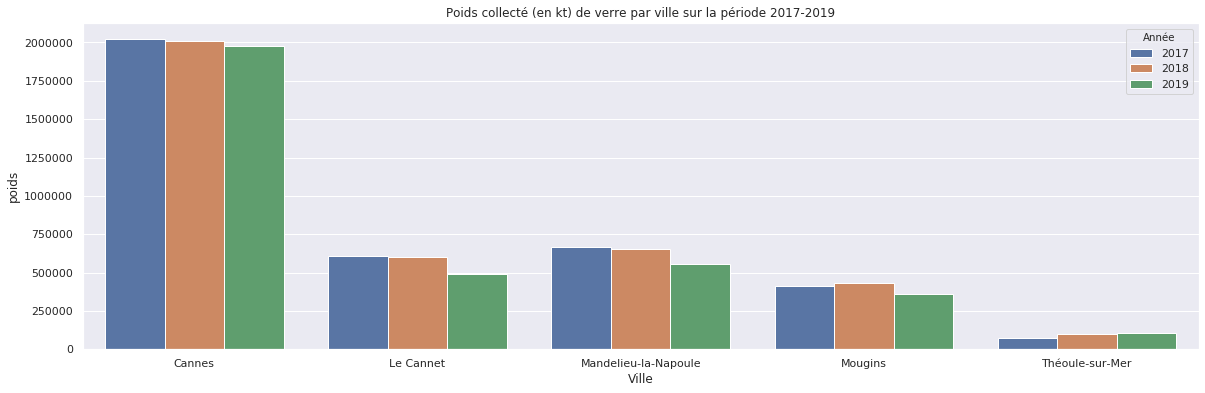

In [372]:
plt.figure(figsize= [20, 6])
plt.title("Poids collecté (en kt) de verre par ville sur la période 2017-2019")
sns.barplot(x="Ville", y="poids", hue="Année", data=data171819poids)

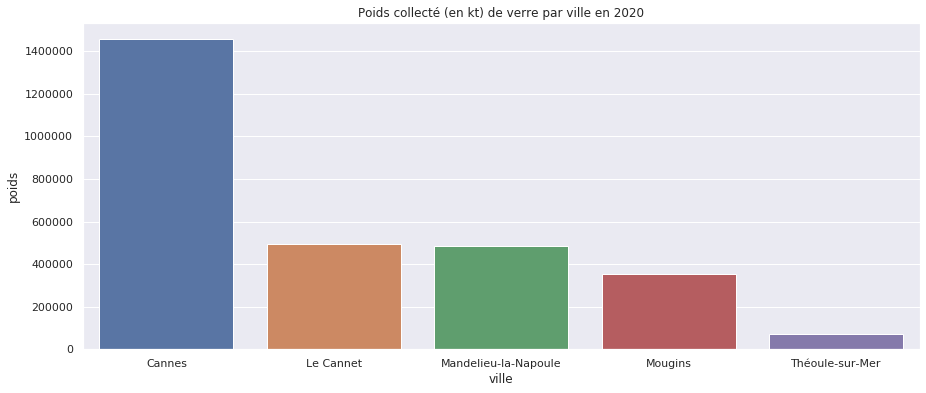

In [373]:
data20poids = data20.groupby(by=["ville"])["Poids"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kt) de verre par ville en 2020")
sns.barplot(x="ville", y="poids", data=data20poids)

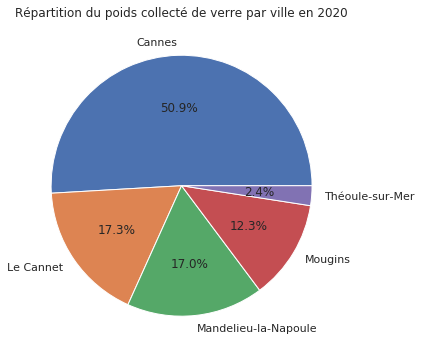

In [374]:
plt.figure(figsize= [15, 6])
plt.title("Répartition du poids collecté de verre par ville en 2020")
plt.pie(x=data20poids["poids"], labels=data20poids["ville"], autopct='%1.1f%%')
plt.show()

## Graphiques sur les poids collectés par adresses (regroupées par ville) et par année


### Cannes

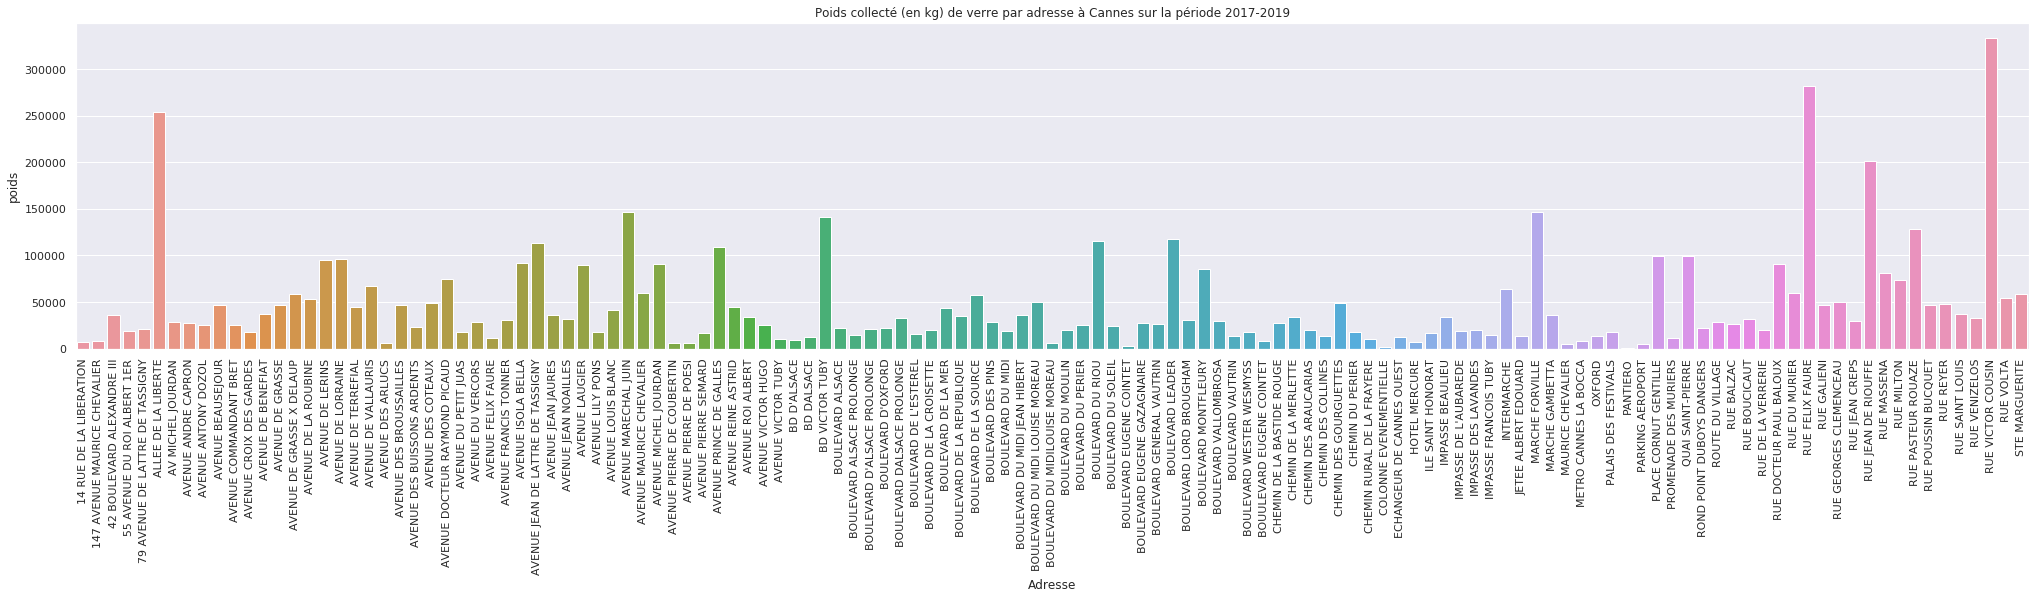

In [375]:
dataCannes171819poids = dataCannes171819.groupby(by=["Adresse"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [35, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Cannes sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataCannes171819poids)

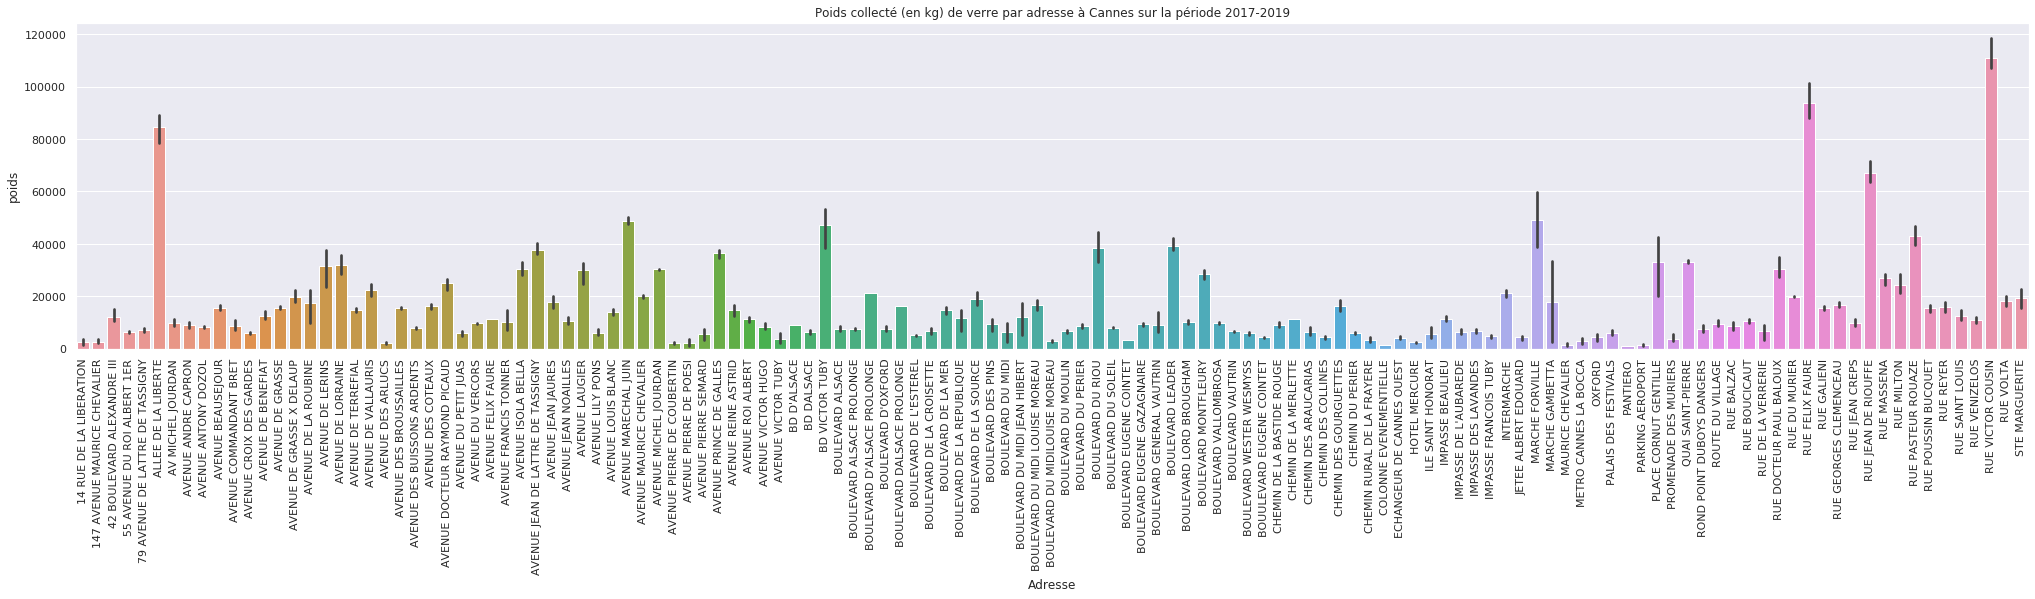

In [376]:
dataCannes171819poidsAnnee = dataCannes171819.groupby(by=["Adresse", "Année"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [35, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Cannes sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataCannes171819poidsAnnee)

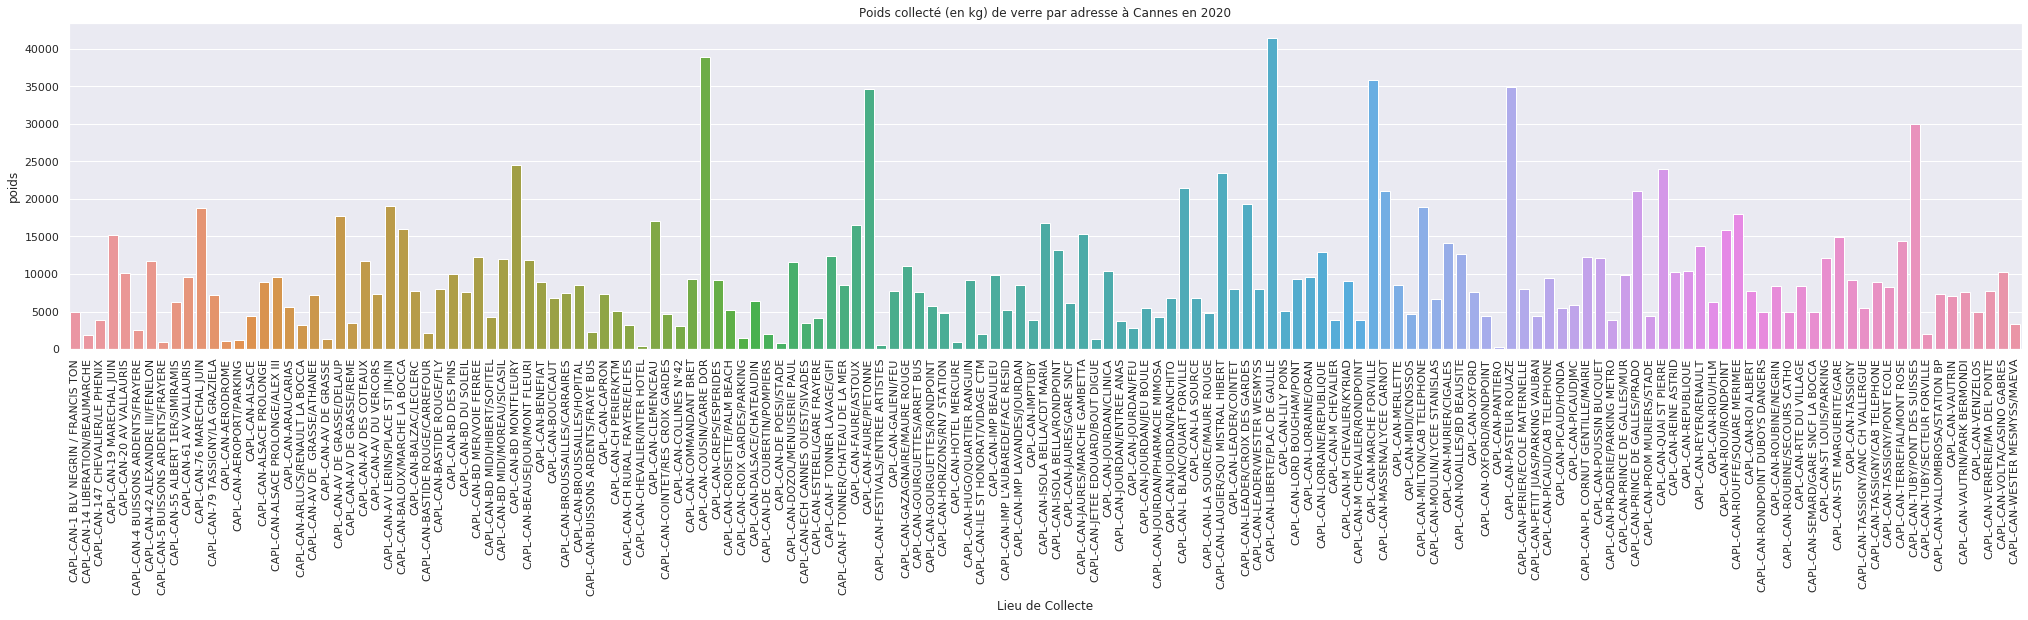

In [377]:
dataCannes20poids = dataCannes20.groupby(by=["Lieu de Collecte"])["Poids"].sum().reset_index(name="poids")

plt.figure(figsize= [35, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Cannes en 2020")
plt.xticks(rotation=90)
sns.barplot(x="Lieu de Collecte", y="poids", data=dataCannes20poids)

### Le Cannet

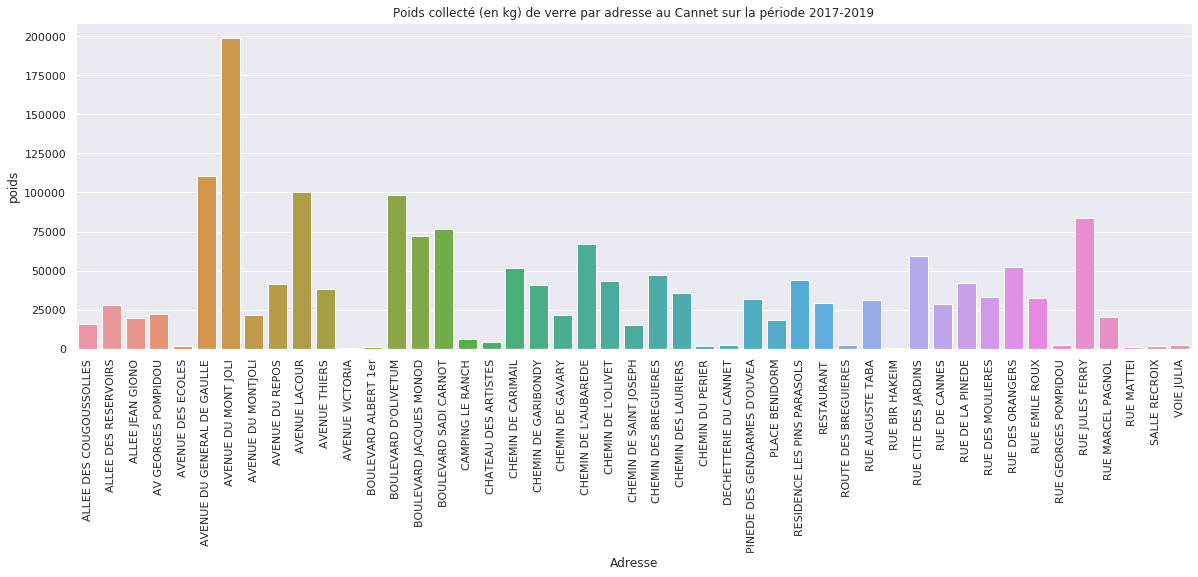

In [378]:
dataCannet171819poids = dataCannet171819.groupby(by=["Adresse"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [20, 6])
plt.title("Poids collecté (en kg) de verre par adresse au Cannet sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataCannet171819poids)

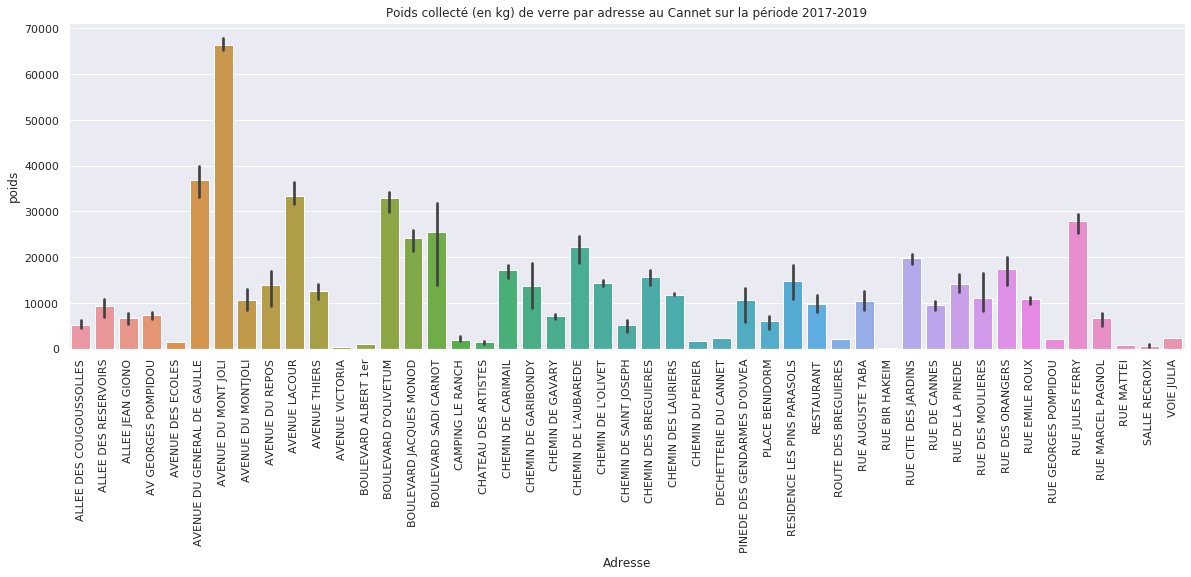

In [379]:
dataCannet171819poidsAnnee = dataCannet171819.groupby(by=["Adresse", "Année"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [20, 6])
plt.title("Poids collecté (en kg) de verre par adresse au Cannet sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataCannet171819poidsAnnee)

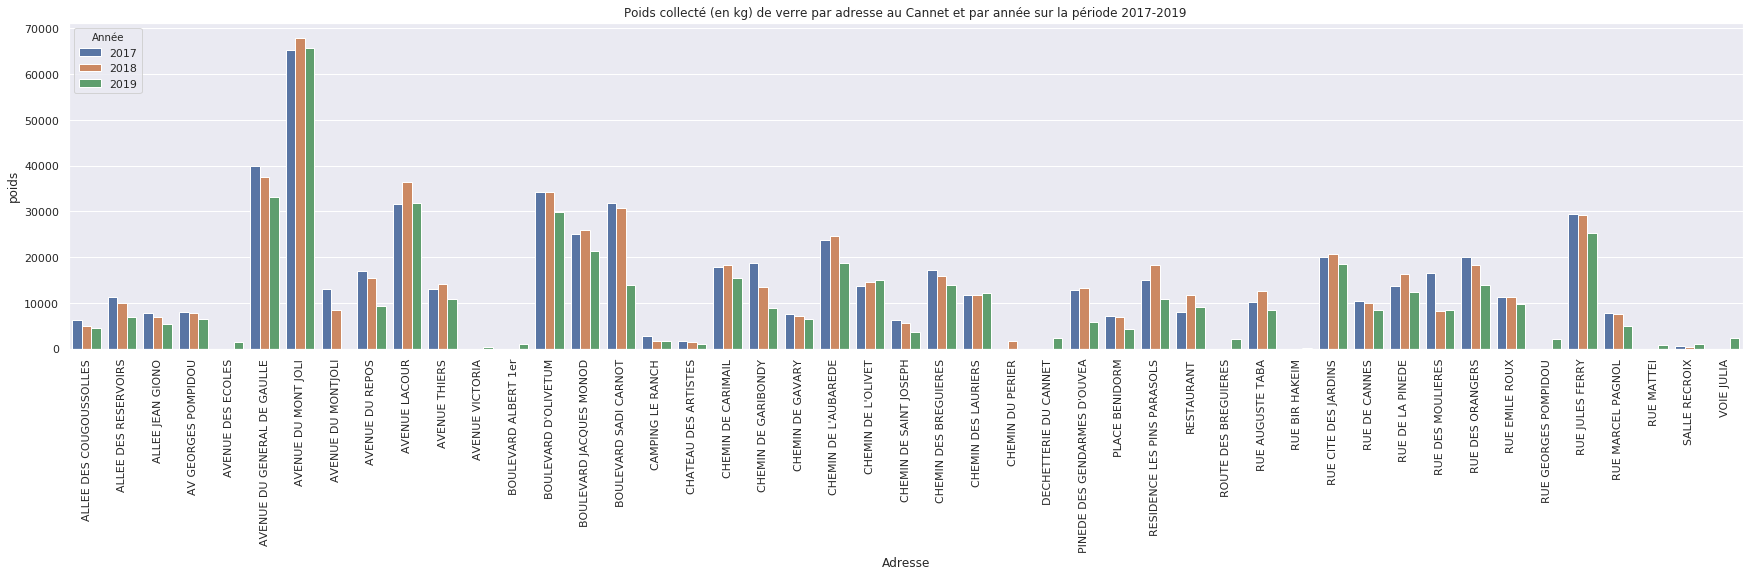

In [380]:
plt.figure(figsize= [30, 6])
plt.title("Poids collecté (en kg) de verre par adresse au Cannet et par année sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataCannet171819poidsAnnee, hue="Année")

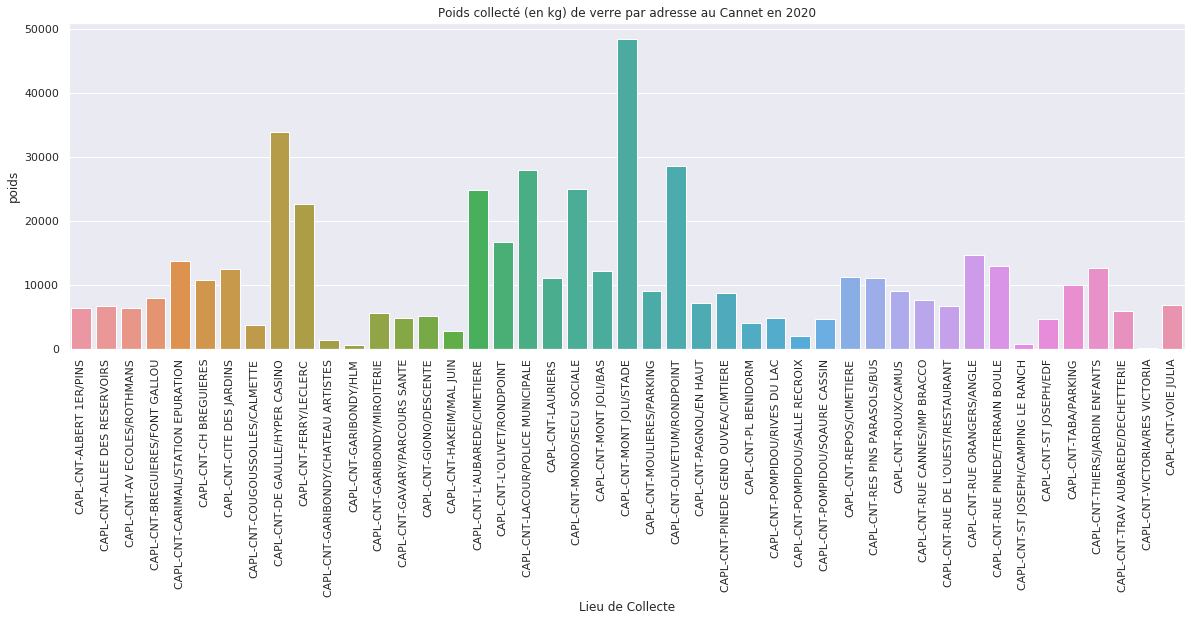

In [381]:
dataCannet20poids = dataCannet20.groupby(by=["Lieu de Collecte"])["Poids"].sum().reset_index(name="poids")

plt.figure(figsize= [20, 6])
plt.title("Poids collecté (en kg) de verre par adresse au Cannet en 2020")
plt.xticks(rotation=90)
sns.barplot(x="Lieu de Collecte", y="poids", data=dataCannet20poids)

### Mandelieu-la-Napoule

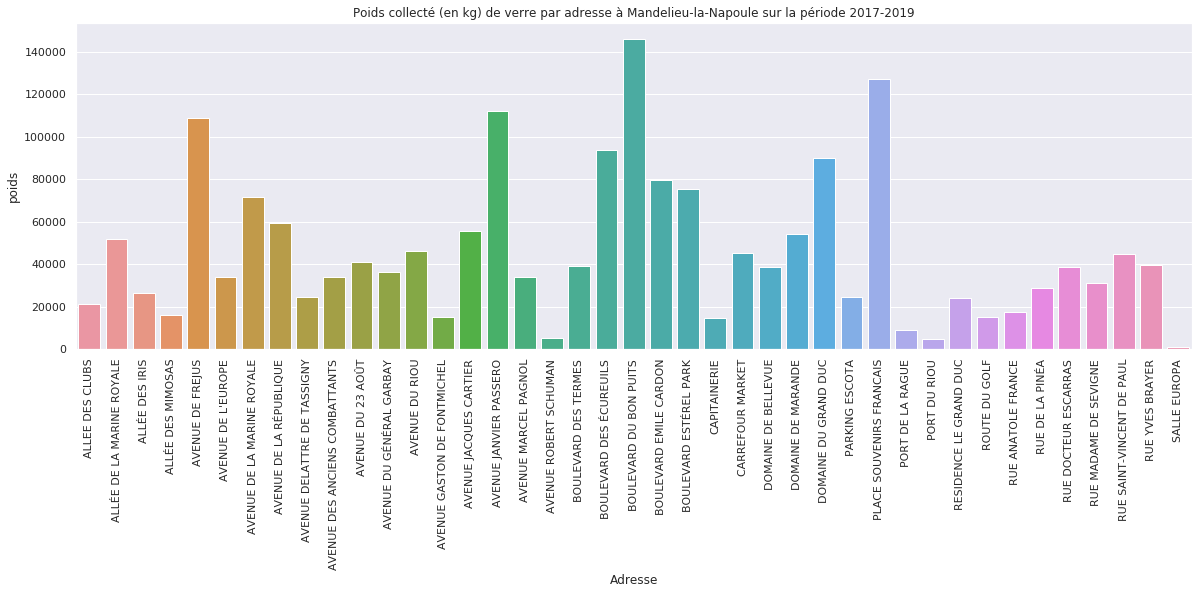

In [382]:
dataMandelieu171819poids = dataMandelieu171819.groupby(by=["Adresse"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [20, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Mandelieu-la-Napoule sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataMandelieu171819poids)

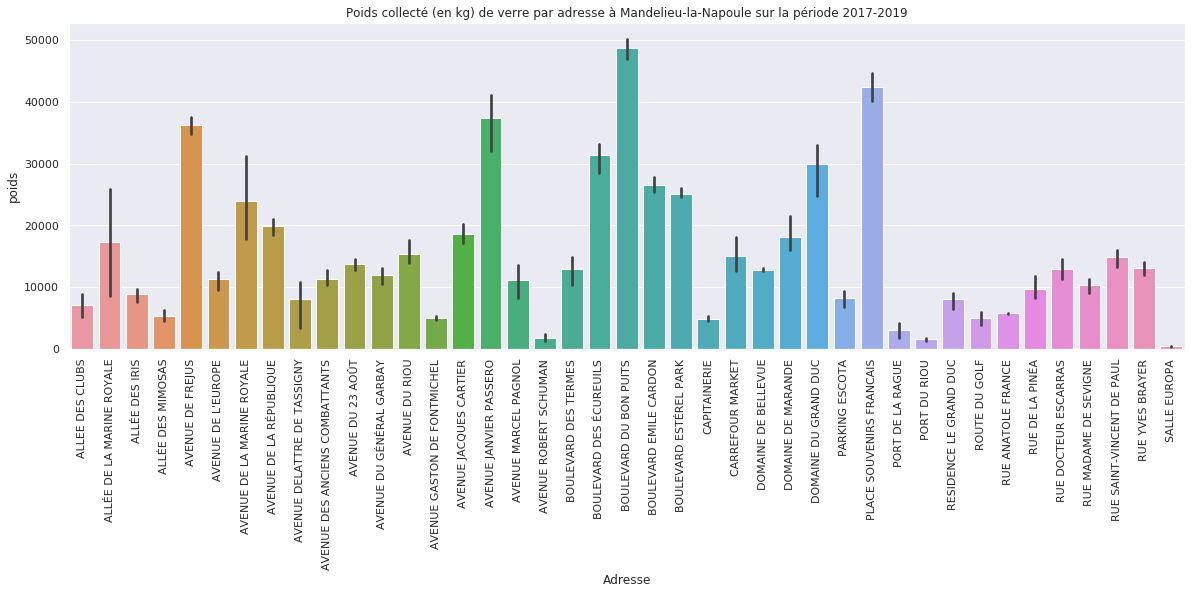

In [383]:
dataMandelieu171819poidsAnnee = dataMandelieu171819.groupby(by=["Adresse", "Année"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [20, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Mandelieu-la-Napoule sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataMandelieu171819poidsAnnee)

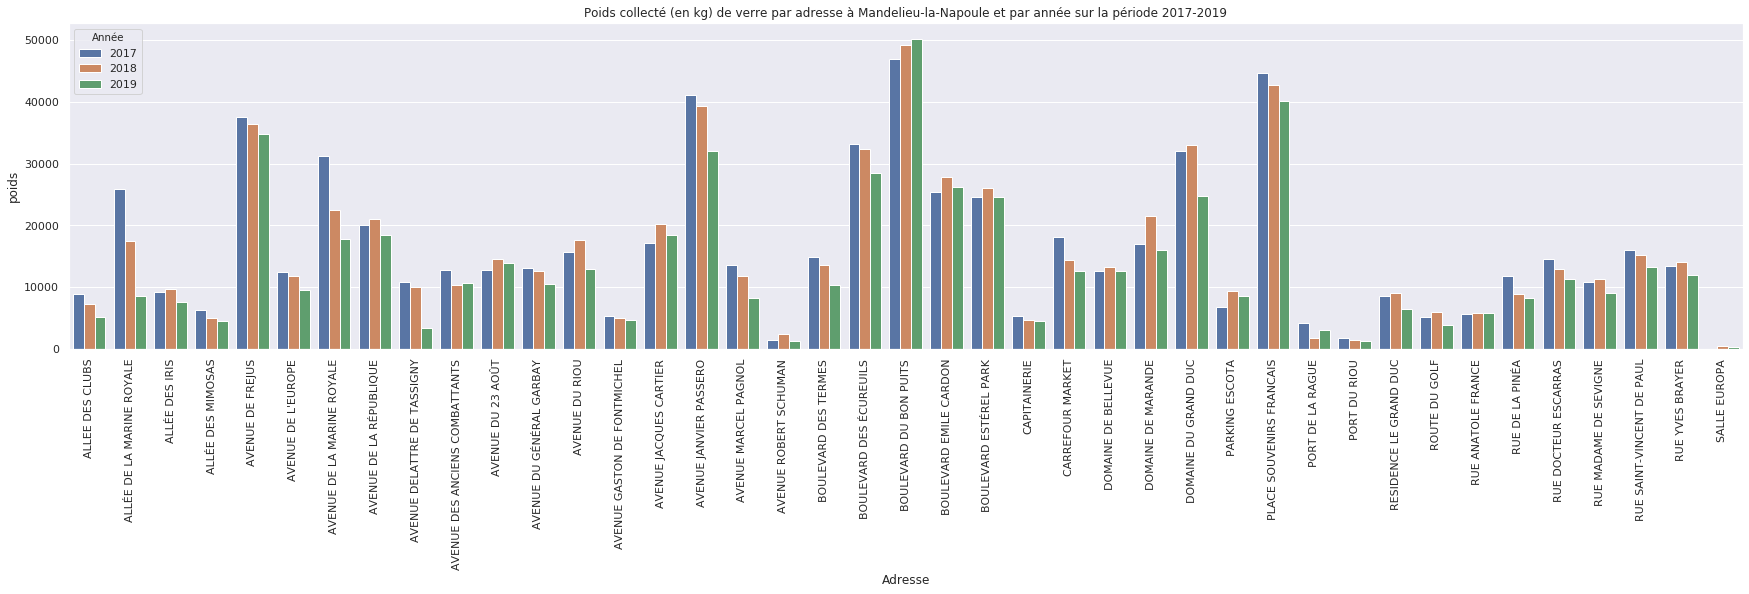

In [384]:
plt.figure(figsize= [30, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Mandelieu-la-Napoule et par année sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataMandelieu171819poidsAnnee, hue="Année")

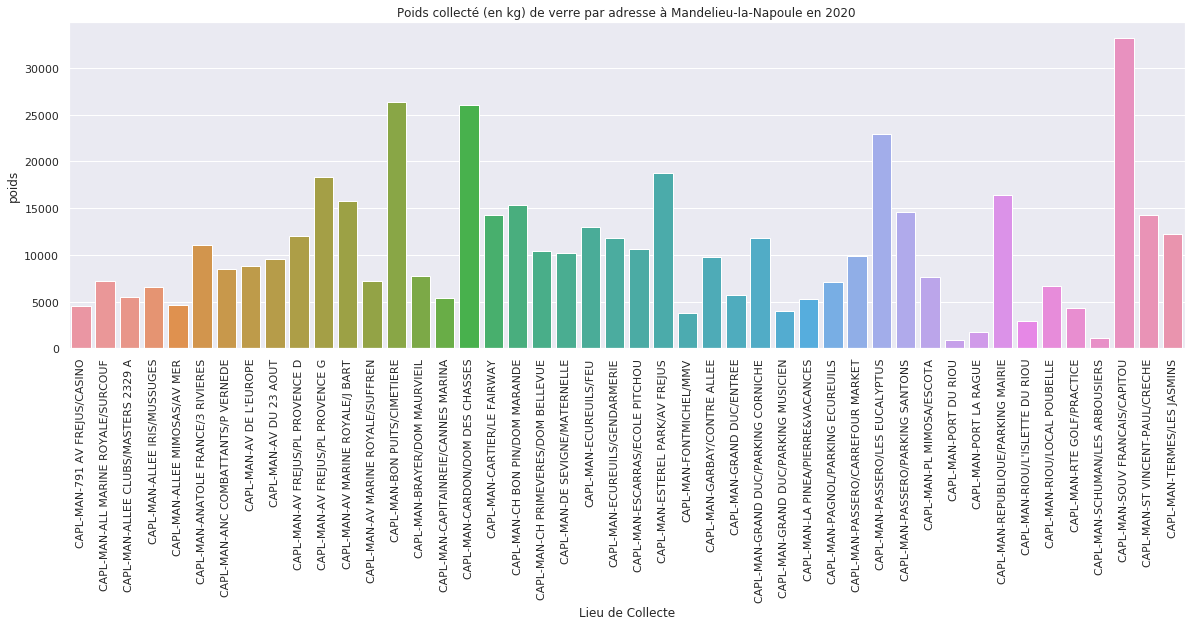

In [385]:
dataMandelieu20poids = dataMandelieu20.groupby(by=["Lieu de Collecte"])["Poids"].sum().reset_index(name="poids")

plt.figure(figsize= [20, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Mandelieu-la-Napoule en 2020")
plt.xticks(rotation=90)
sns.barplot(x="Lieu de Collecte", y="poids", data=dataMandelieu20poids)

### Mougins

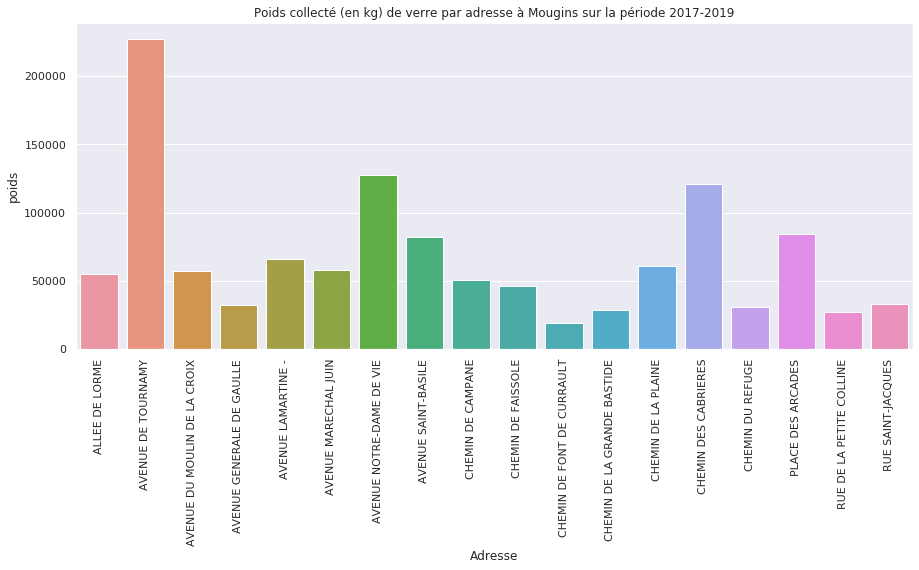

In [386]:
dataMougins171819poids = dataMougins171819.groupby(by=["Adresse"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Mougins sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataMougins171819poids)

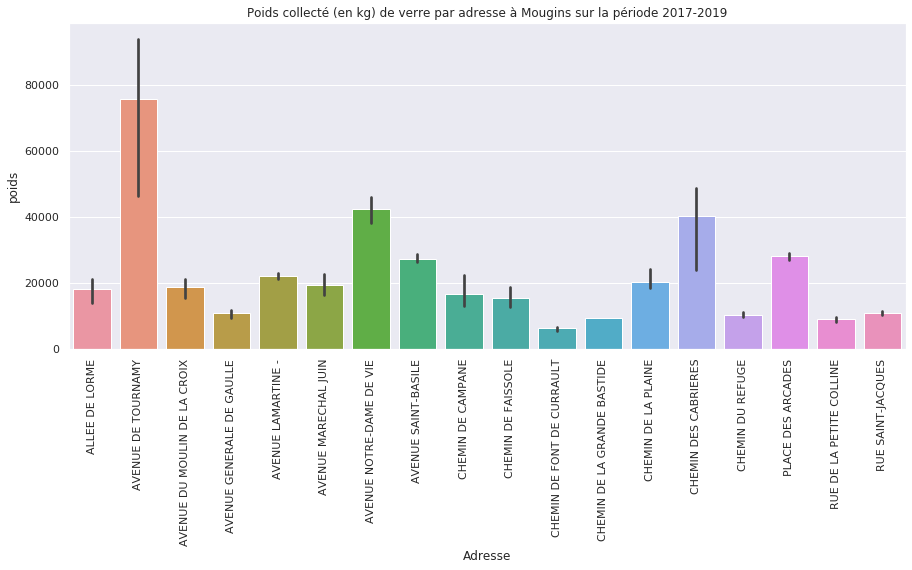

In [387]:
dataMougins171819poidsAnnee = dataMougins171819.groupby(by=["Adresse", "Année"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Mougins sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataMougins171819poidsAnnee)

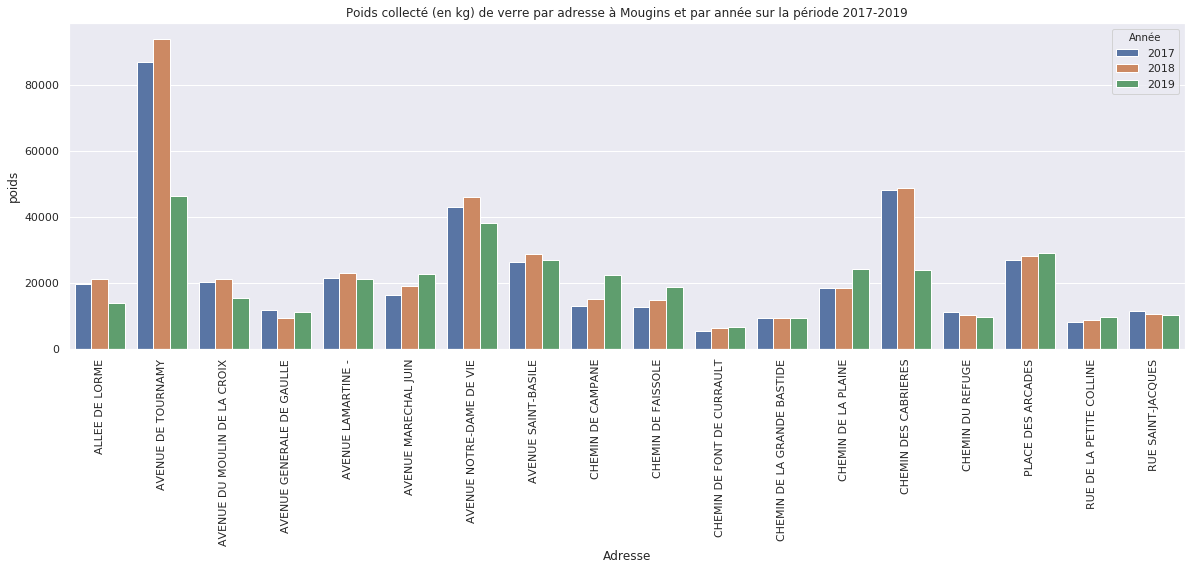

In [388]:
plt.figure(figsize= [20, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Mougins et par année sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataMougins171819poidsAnnee, hue="Année")

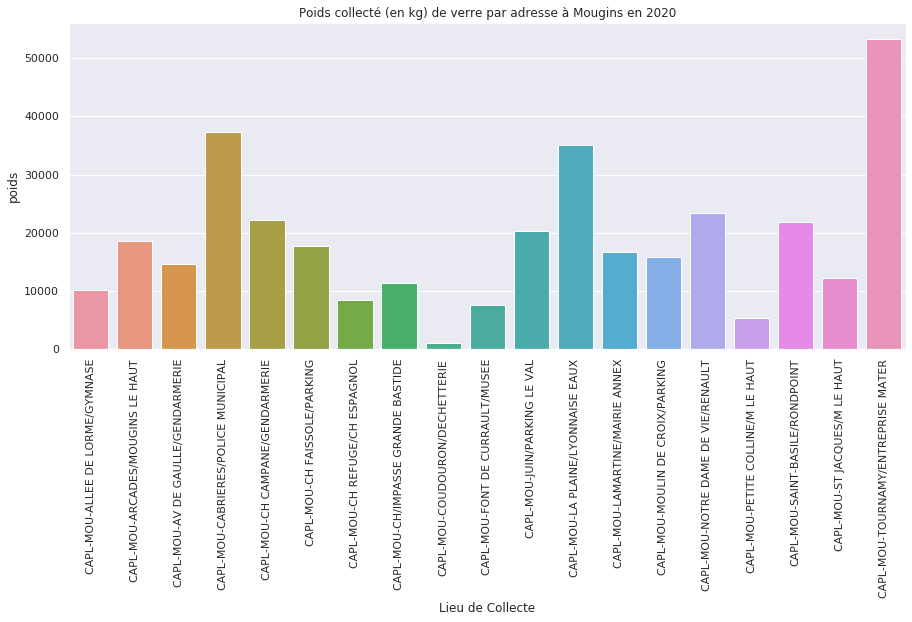

In [389]:
dataMougins20poids = dataMougins20.groupby(by=["Lieu de Collecte"])["Poids"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Mougins en 2020")
plt.xticks(rotation=90)
sns.barplot(x="Lieu de Collecte", y="poids", data=dataMougins20poids)

### Théoule-sur-Mer

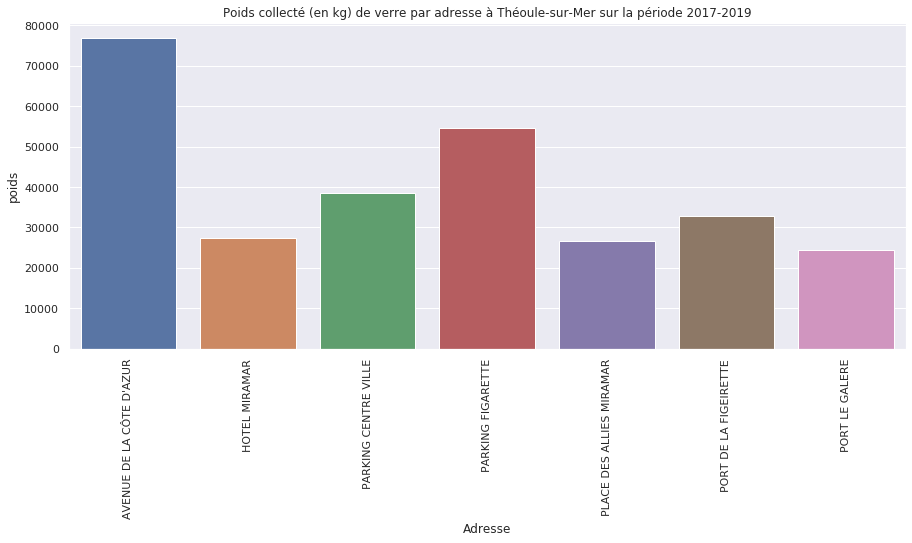

In [390]:
dataTheoule171819poids = dataTheoule171819.groupby(by=["Adresse"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Théoule-sur-Mer sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataTheoule171819poids)

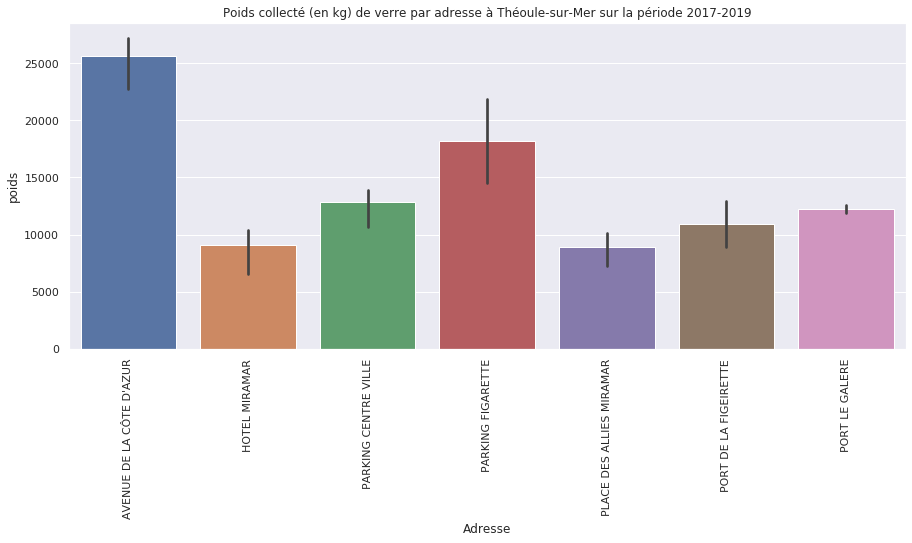

In [391]:
dataTheoule171819poidsAnnee = dataTheoule171819.groupby(by=["Adresse", "Année"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Théoule-sur-Mer sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataTheoule171819poidsAnnee)

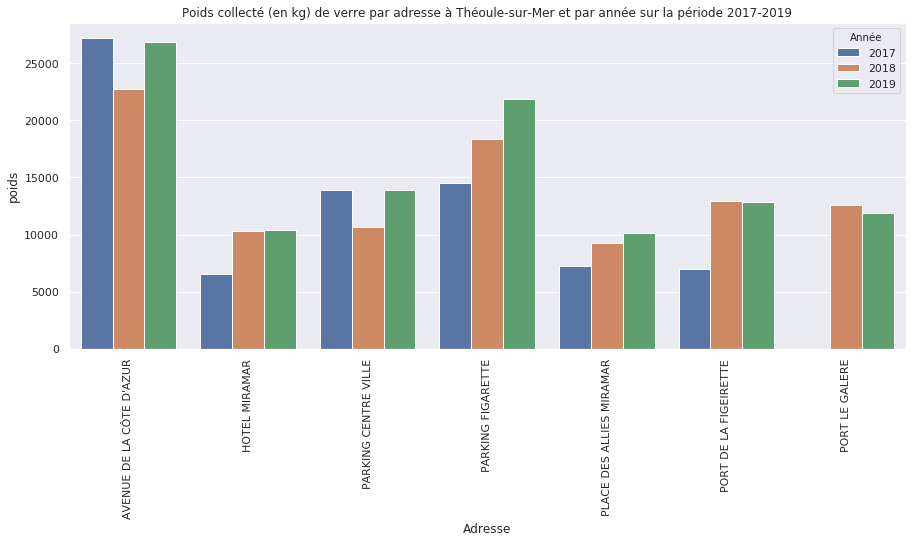

In [392]:
plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Théoule-sur-Mer et par année sur la période 2017-2019")
plt.xticks(rotation=90)
sns.barplot(x="Adresse", y="poids", data=dataTheoule171819poidsAnnee, hue="Année")

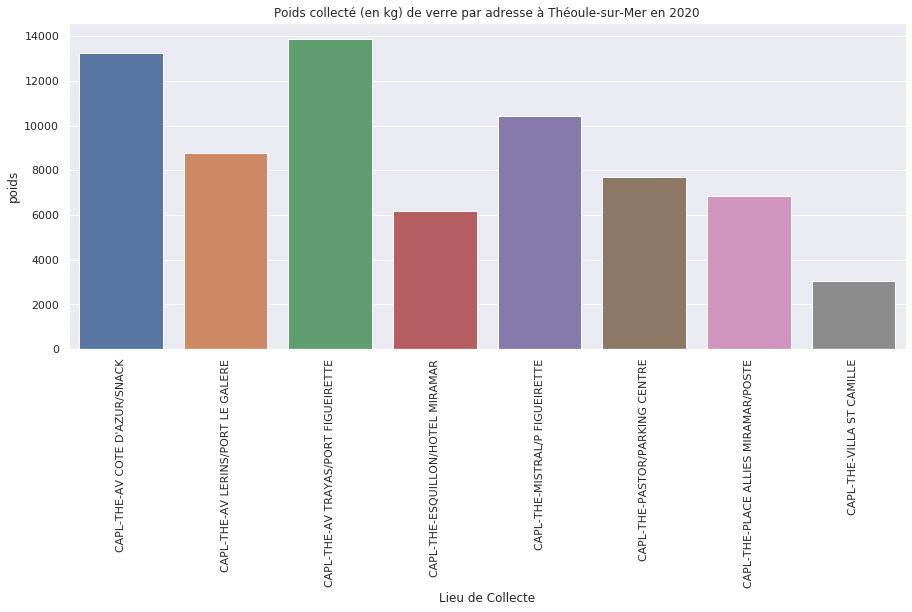

In [393]:
dataTheoule20poids = dataTheoule20.groupby(by=["Lieu de Collecte"])["Poids"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
plt.title("Poids collecté (en kg) de verre par adresse à Théoule-sur-Mer en 2020")
plt.xticks(rotation=90)
sns.barplot(x="Lieu de Collecte", y="poids", data=dataTheoule20poids)

## Graphiques sur les poids collectés par mois (par année) et par ville

Text(0.5, 1.0, 'Poids collecté (en kg) de verre par mois et par ville en 2017')

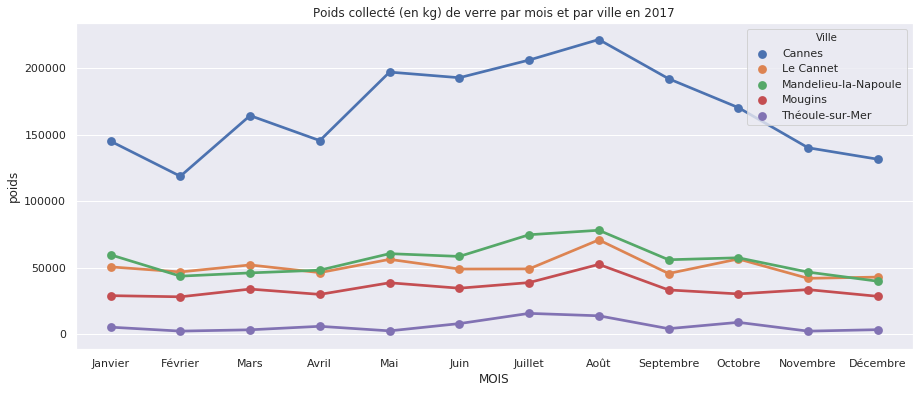

In [394]:
data17moisPoids = data17.groupby(by=["MOIS", "Ville"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
sns.pointplot(x="MOIS", y="poids", hue="Ville", data=data17moisPoids, order=listeMois)
plt.title("Poids collecté (en kg) de verre par mois et par ville en 2017")

Text(0.5, 1.0, 'Poids collecté (en kg) de verre par mois et par ville en 2018')

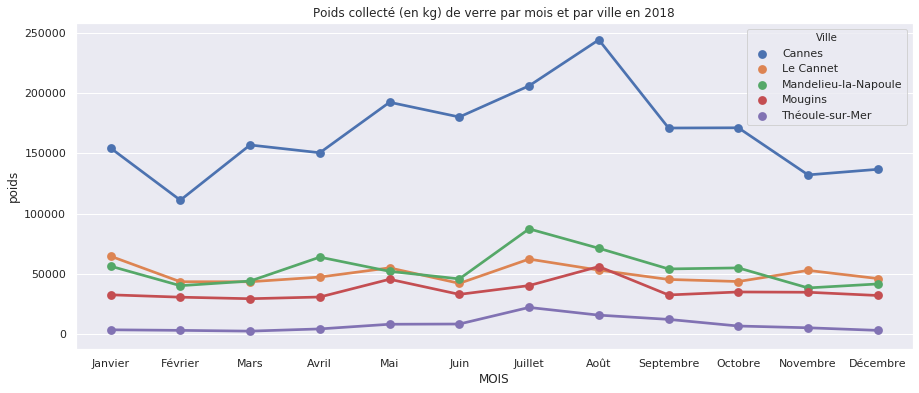

In [395]:
data18moisPoids = data18.groupby(by=["MOIS", "Ville"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
sns.pointplot(x="MOIS", y="poids", hue="Ville", data=data18moisPoids, order=listeMois)
plt.title("Poids collecté (en kg) de verre par mois et par ville en 2018")

Text(0.5, 1.0, 'Poids collecté (en kg) de verre par mois et par ville en 2019')

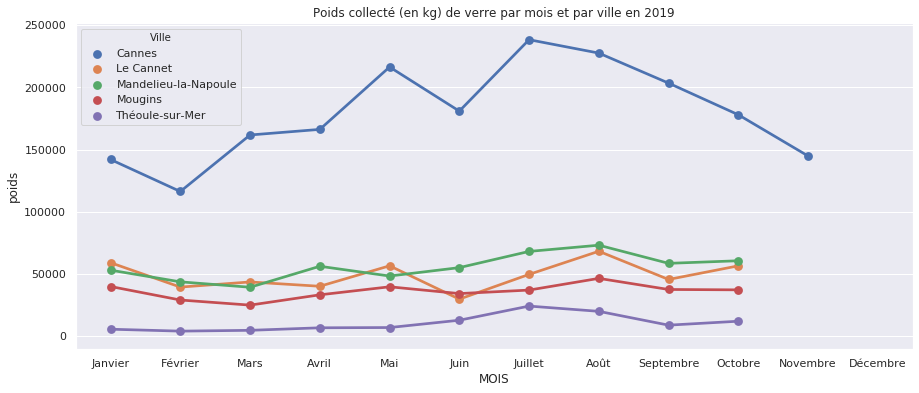

In [396]:
data19moisPoids = data19.groupby(by=["MOIS", "Ville"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
sns.pointplot(x="MOIS", y="poids", hue="Ville", data=data19moisPoids, order=listeMois)
plt.title("Poids collecté (en kg) de verre par mois et par ville en 2019")

Text(0.5, 1.0, 'Poids collecté (en kg) de verre par mois et par ville pour la période 2017-2019')

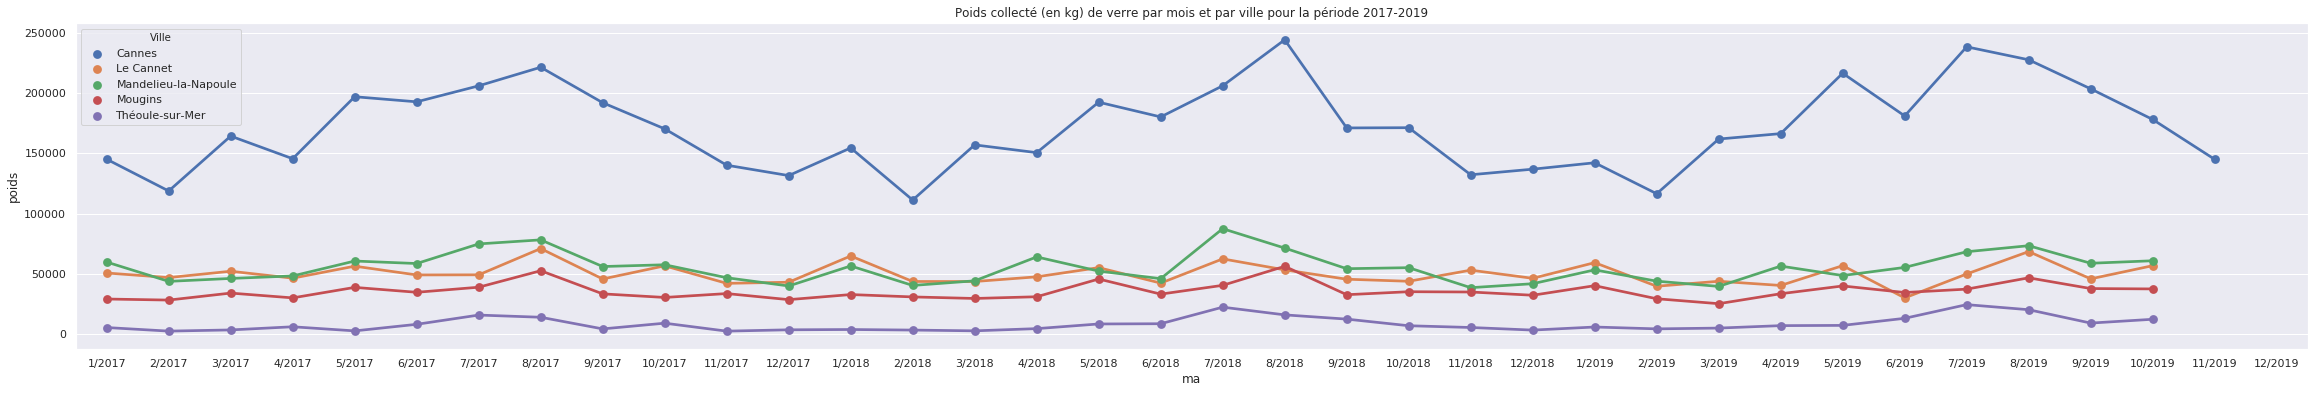

In [397]:
data171819moisPoids = data171819.groupby(by=["ma", "Ville"])["Poids Kg"].sum().reset_index(name="poids")

plt.figure(figsize= [40, 6])
sns.pointplot(x="ma", y="poids", hue="Ville", data=data171819moisPoids, order=listeMA)
plt.title("Poids collecté (en kg) de verre par mois et par ville pour la période 2017-2019")

Text(0.5, 1.0, 'Poids collecté (en kg) de verre par mois et par ville en 2020')

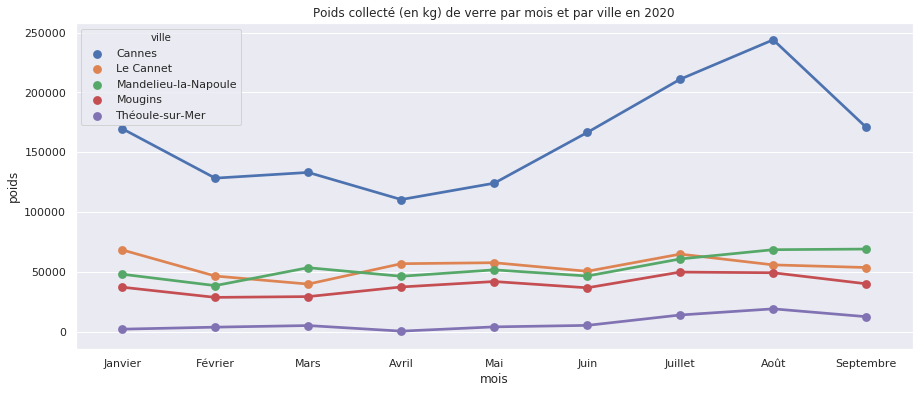

In [398]:
data20moisPoids = data20.groupby(by=["mois", "ville"])["Poids"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
sns.pointplot(x="mois", y="poids", hue="ville", data=data20moisPoids, order=listeMois[:9])
plt.title("Poids collecté (en kg) de verre par mois et par ville en 2020")

---

# <p style="font-family: serif; font-size:2.2em;;"><u>Analyse des données</u></p>Visualisation et Analyse des données.

---

### Création des Dataframes et des fonctions associés à l'analyse des données

In [399]:
# DataFrame collecte poids par mois et par ville en 2020
#data20moisPoids

# Création de DataFrame somme du poids totale des collectes par villes en 2020
dm20p = data20moisPoids.groupby(by=[ "ville"])["poids"].sum().reset_index(name="total_poids")
#dm20p

# Répartition en pourcentage du poids collectes par mois et ville en 2020
dm20pt = pd.DataFrame(columns = ['mois', 'ville', 'poids', 'total_poids'])
for i in range(data20moisPoids.shape[0]):
    for j in dm20p.index:
        if data20moisPoids.iloc[i].ville == dm20p.iloc[j].ville:
            tmp = round((data20moisPoids['poids'][i]*100)/dm20p['total_poids'][j], 2)
            df = pd.DataFrame({'mois': data20moisPoids.iloc[i].mois,
                       'ville':data20moisPoids.iloc[i].ville,
                       'poids':data20moisPoids['poids'][i],
                       'total_poids': tmp}, columns = ['mois', 'ville', 'poids', 'total_poids'], index=[0])
    
    dm20pt = dm20pt.append(df, ignore_index=True)
#dm20pt

# Verification des pourcentages
#dm20pt_test = dm20pt.groupby(by=[ "ville"])["total_poids"].sum().reset_index(name="total_poids")
#dm20pt_test

In [400]:
# DataFrame nombre collectes par mois et par ville en 2020
#data20mois

# Création de DataFrame somme totale des collectes par villes en 2020
dm20 = data20mois.groupby(by=[ "ville"])["count"].sum().reset_index(name="total_collecte")
#dm20

# Répartition en pourcentage du nombre de collectes par mois et ville en 2020
dm20t = pd.DataFrame(columns = ['mois', 'ville', 'count', 'total_collecte'])
for i in range(data20mois.shape[0]):
    for j in dm20.index:
        if data20mois.iloc[i].ville == dm20.iloc[j].ville:
            tmp = round((data20mois['count'][i]*100)/dm20['total_collecte'][j], 2)
            df = pd.DataFrame({'mois': data20mois.iloc[i].mois,
                       'ville':data20mois.iloc[i].ville,
                       'count':data20mois['count'][i],
                       'total_collecte': tmp}, columns = ['mois', 'ville', 'count', 'total_collecte'], index=[0])
    
    dm20t = dm20t.append(df, ignore_index=True)
#dm20t

# Verification des pourcentages
#dm20t_test = dm20t.groupby(by=[ "ville"])["total_collecte"].sum().reset_index(name="total_collecte")
#d

In [401]:
# Fonction graph comparaison poids/collecte en pourcentage
def graph(ville):
    savefile = "../web/img/"
    df20t = dm20t[dm20t["ville"] == ville]
    df20pt = dm20pt[dm20pt["ville"] == ville]
    plt.figure(figsize= [15, 6])
    sns.pointplot(x="mois", y="total_poids", hue="total_poids", data=df20pt, order=listeMois[:9])
    sns.pointplot(x="mois", y="total_collecte", data=df20t, order=listeMois[:9])
    plt.ylabel("aa")
    plt.title("Répartition en pourcentage du nombre de collectes et du poids pour la ville de {} par mois en 2020".format(ville))
    plt.savefig(savefile+"graph_{}".format(ville)+".png", dpi = 100, format = "png")
    
    
    
    

---

### Representation Graphique du nombre de collectes et du poids collecté.

Text(0.5, 1.0, 'Nombre de collectes de verre par mois et par ville en 2020')

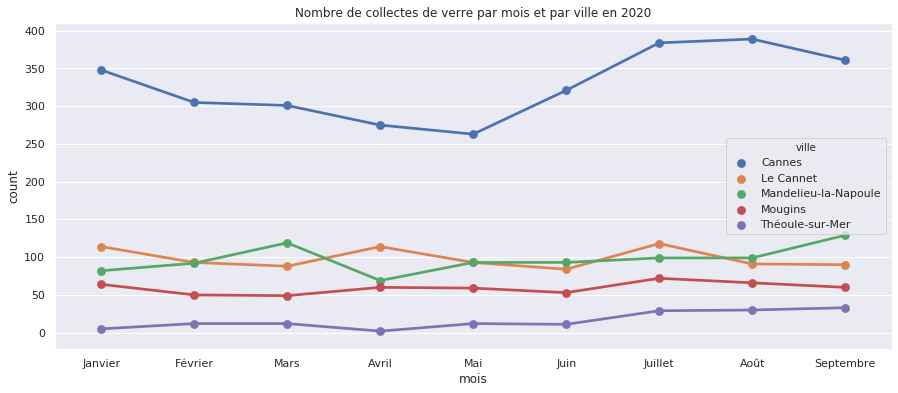

In [402]:
plt.figure(figsize= [15, 6])
sns.pointplot(x="mois", y="count", hue="ville", data=data20mois, order=listeMois[:9])
plt.title("Nombre de collectes de verre par mois et par ville en 2020")

Text(0.5, 1.0, 'Poids collecté (en kg) de verre par mois et par ville en 2020')

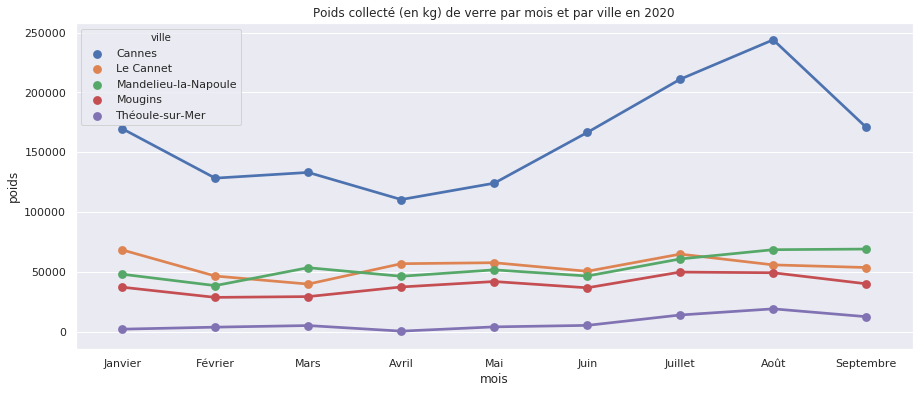

In [403]:
data20moisPoids = data20.groupby(by=["mois", "ville"])["Poids"].sum().reset_index(name="poids")

plt.figure(figsize= [15, 6])
sns.pointplot(x="mois", y="poids", hue="ville", data=data20moisPoids, order=listeMois[:9])
plt.title("Poids collecté (en kg) de verre par mois et par ville en 2020")

Text(0.5, 1.0, 'Répartition en pourcentage du nombre de collectes par mois et ville en 2020')

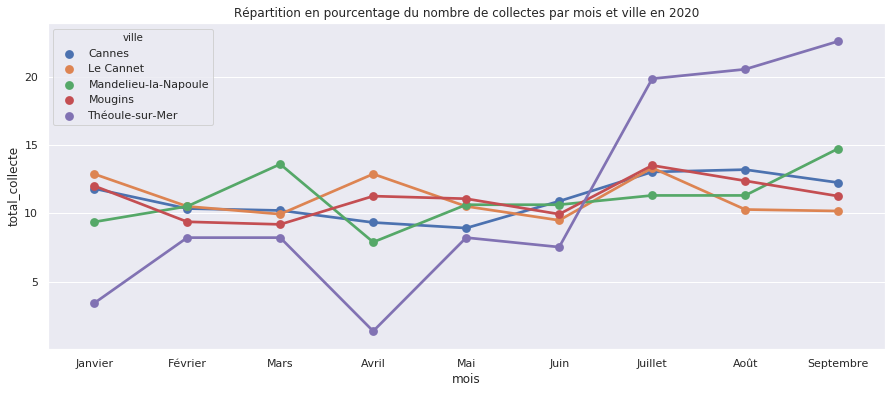

In [404]:
plt.figure(figsize= [15, 6])
sns.pointplot(x="mois", y="total_collecte", hue="ville", data=dm20t, order=listeMois[:9])
plt.title("Répartition en pourcentage du nombre de collectes par mois et ville en 2020")

Text(0.5, 1.0, 'Répartition en pourcentage du poids collecté par mois et ville en 2020')

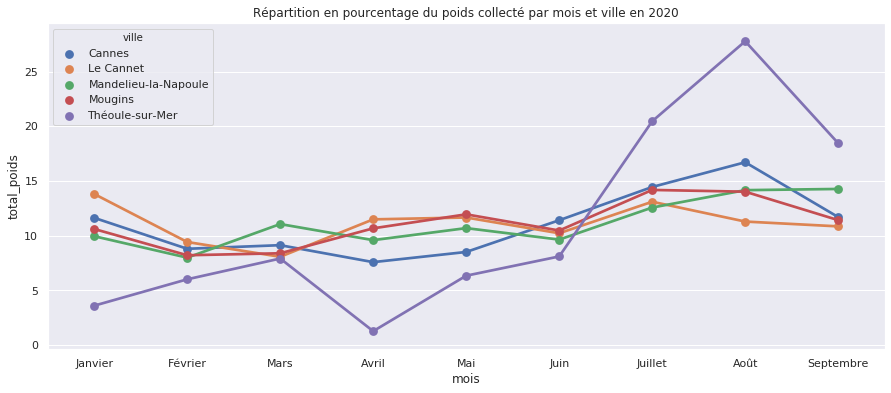

In [405]:
plt.figure(figsize= [15, 6])
sns.pointplot(x="mois", y="total_poids", hue="ville", data=dm20pt, order=listeMois[:9])
plt.title("Répartition en pourcentage du poids collecté par mois et ville en 2020")

---

### Representation Graphique du nombre de collectes et du poids collecté.
(<font color='red'><b><i>Note:</i></b></font> Repartition en pourcentage)

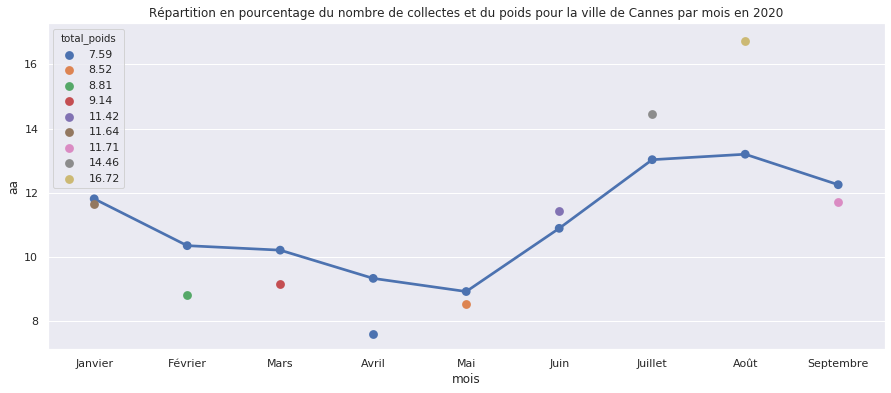

In [406]:
graph("Cannes")

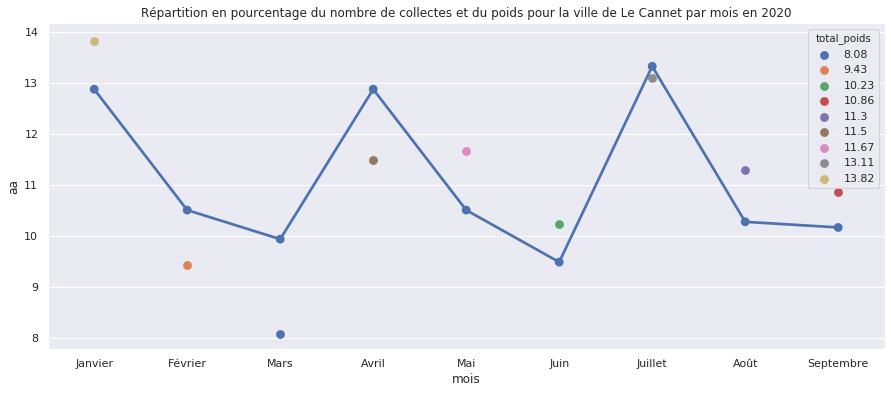

In [407]:
graph("Le Cannet")

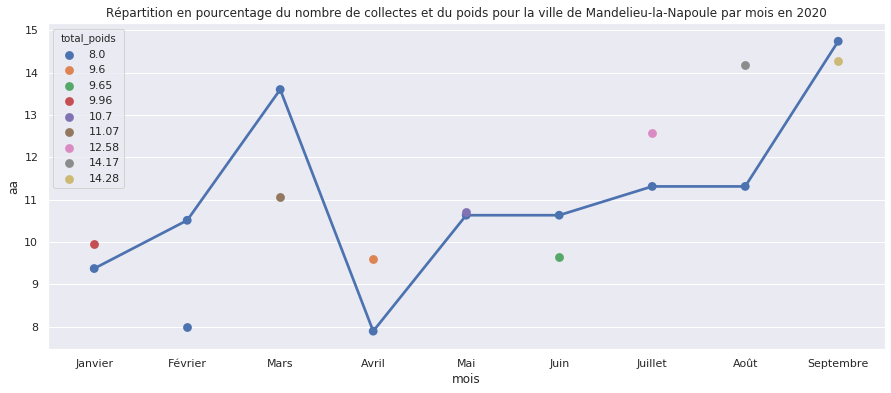

In [408]:
graph("Mandelieu-la-Napoule")

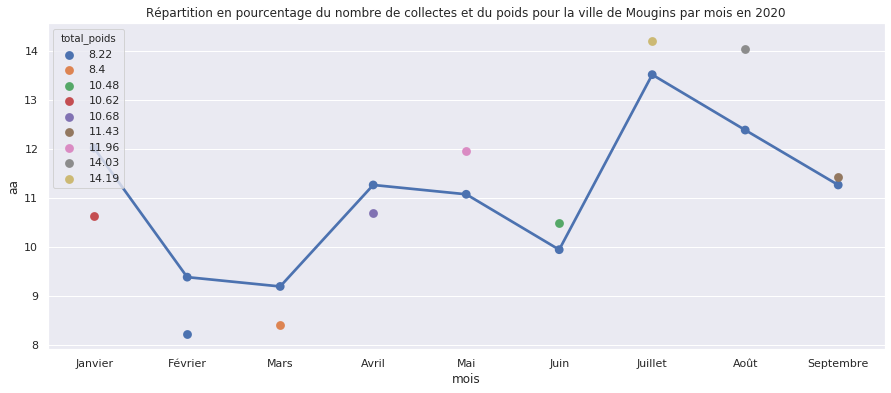

In [409]:
graph("Mougins")

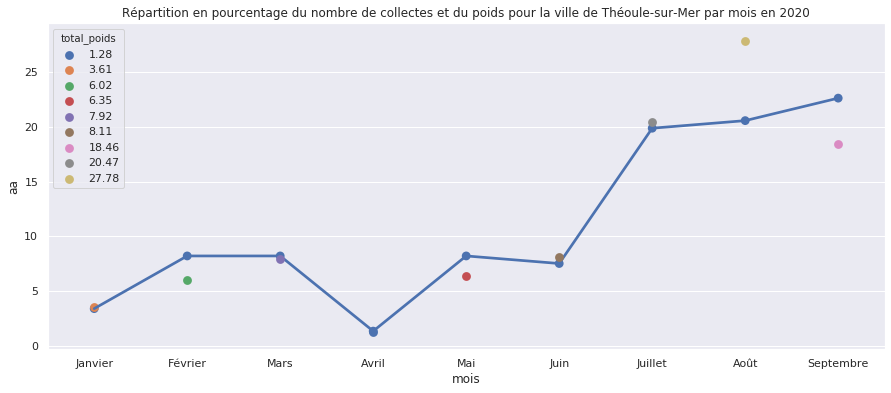

In [410]:
graph("Théoule-sur-Mer")